## Logistic Regression on forest fire dataset

In [1]:
# Numpy and Pandas library
import numpy as np
import pandas as pd

# Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For Q-Q Plot
import scipy.stats as stats

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

# To save the model
import pickle

In [2]:
#Reading the dataset
df = pd.read_csv(r"Algerian_forest_fires_dataset.csv", header=1)

In [3]:
df

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
241  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
242  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
243  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
244  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
245  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
0    0.5   not fire     
1    0.4   not fire     
2    0.1   not fire     
3      0   not fire     
4    0.5   not fire     
..   ...           ...  
241  6.5       fire     
242    0   not fire     
243  0.2   not fire     
244  0.7   not fire     
245  0.5  not fire      

[246 rows x 14 columns]

In [4]:
#Checking the null value
df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [5]:
df.drop([122,123,167],axis = 0,inplace = True)

In [6]:
df.shape

(243, 14)

In [7]:
#Data Cleaning
# columns name having extra spaces
columns_with_spaces = [fea for fea in df.columns if " " in fea]
columns_with_spaces

[' RH', ' Ws', 'Rain ', 'Classes  ']

In [8]:
# removing the space 
# strip() method Remove spaces at the beginning and at the end of the string
df.columns = df.columns.str.strip()

In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [10]:
# function to remove extra space in data
def remove_space(x):
    return x.replace(" ","")

In [11]:
df['Classes'] = df['Classes'].apply(remove_space)

In [12]:
df.head(2)

day month  year Temperature  RH  Ws Rain  FFMC  DMC   DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18    0  65.7  3.4  7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13  1.3  64.4  4.1  7.6    1  3.9  0.4   

   Classes  
0  notfire  
1  notfire

In [13]:
#Creating Region feature

df.loc[:122,'Region'] = 0 # Bejaia region
df.loc[122:,'Region'] = 1 #  Sidi Bel-abbes region 

In [14]:
df.iloc[120:125]

day month  year Temperature  RH  Ws Rain  FFMC  DMC   DC  ISI  BUI  FWI  \
120  29    09  2012          26  80  16  1.8  47.4  2.9  7.7  0.3    3  0.1   
121  30    09  2012          25  78  14  1.4    45  1.9  7.5  0.2  2.4  0.1   
124  01    06  2012          32  71  12  0.7  57.1  2.5  8.2  0.6  2.8  0.2   
125  02    06  2012          30  73  13    4  55.7  2.7  7.8  0.6  2.9  0.2   
126  03    06  2012          29  80  14    2  48.7  2.2  7.6  0.3  2.6  0.1   

     Classes  Region  
120  notfire     0.0  
121  notfire     0.0  
124  notfire     1.0  
125  notfire     1.0  
126  notfire     1.0

In [15]:
#Datatypes and Describe
# here it is visible that all datatypes are in object 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4   RH           243 non-null    object 
 5   Ws           243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 38.5+ KB


In [16]:
#Convert notfire and fire to 0 and 1 respectively for Classes feature
df['Classes'].unique()

array(['notfire', 'fire'], dtype=object)

In [17]:
df['Classes'] = df['Classes'].replace({"notfire":0,'fire':1})
df['Classes'].unique()

array([0, 1], dtype=int64)

In [18]:
#Changing datatype to Numerical from object
#changing datatypes of features to numerical for numerical features as all are in object

datatype_convert = {'day':'int64', 'month':'int64', 'year':'int64', 
                    'Temperature':'int64', 'RH':'int64', 'Ws':'int64', 
                    'Rain':'float64', 'FFMC':'float64','DMC':'float64', 
                    'DC':'float64', 'ISI':'float64', 'BUI':'float64',
                    'FWI':'float64', 'Classes':'int64', 'Region':'float64'
                   }

df = df.astype(datatype_convert)
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region         float64
dtype: object

* So, all the features are converted from categorical to numerical datatypes

In [19]:
#Now again check the null value and duplicates
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [20]:
df.duplicated().value_counts()

False    243
dtype: int64

In [21]:
df.shape

(243, 15)

- After data cleaning there are 243 rows and 15 columns.
- There is no null value in dataset.
- There is no duplicate observation in dataset

In [22]:
#Creating a copy of dataframe from original Dataframe
data = df.copy()
data.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes  Region  
0  0.5        0     0.0  
1  0.4        0     0.0  
2  0.1        0     0.0  
3  0.0        0     0.0  
4  0.5        0     0.0

In [23]:
#Statistical Analysis
data.cov()

day     month  year  Temperature          RH         Ws  \
day           78.190729 -0.003639   0.0     3.119138   -9.969476   1.188603   
month         -0.003639  1.242764   0.0    -0.229653   -0.681903  -0.124987   
year           0.000000  0.000000   0.0     0.000000    0.000000   0.000000   
Temperature    3.119138 -0.229653   0.0    13.162670  -35.043482  -2.901949   
RH            -9.969476 -0.681903   0.0   -35.043482  219.874333  10.173809   
Ws             1.188603 -0.124987   0.0    -2.901949   10.173809   7.903887   
Rain          -1.993174  0.077762   0.0    -2.372850    6.604836   0.965886   
FFMC          28.544043  0.272433   0.0    35.222858 -137.215388  -6.718952   
DMC           53.863133  0.938676   0.0    21.837668  -75.071928  -0.025120   
DC           222.524339  6.722457   0.0    65.071727 -160.400449  10.604530   
ISI            6.632060  0.303838   0.0     9.101371  -42.298446   0.099643   
BUI           65.061368  1.349400   0.0    23.734918  -74.653741   1.257586   
FWI           23.079143  0.685464   0.0    15.297068  -64.096917   0.677079   
Classes        0.891321  0.013298   0.0     0.930330   -3.184454  -0.097745   
Region         0.003639  0.001037   0.0     0.489984   -2.991651  -0.255178   

                  Rain        FFMC         DMC           DC         ISI  \
day          -1.993174   28.544043   53.863133   222.524339    6.632060   
month         0.077762    0.272433    0.938676     6.722457    0.303838   
year          0.000000    0.000000    0.000000     0.000000    0.000000   
Temperature  -2.372850   35.222858   21.837668    65.071727    9.101371   
RH            6.604836 -137.215388  -75.071928  -160.400449  -42.298446   
Ws            0.965886   -6.718952   -0.025120    10.604530    0.099643   
Rain          4.012837  -15.634746   -7.169025   -28.456455   -2.891688   
FFMC        -15.634746  205.912204  107.342972   347.051372   44.113113   
DMC          -7.169025  107.342972  153.587434   517.427748   35.032228   
DC          -28.456455  347.051372  517.427748  2272.009994  100.718521   
ISI          -2.891688   44.113113   35.032228   100.718521   17.257659   
BUI          -8.546509  120.872510  173.203205   638.862525   38.071147   
FWI          -4.835502   73.791799   80.764530   262.277746   28.526552   
Classes      -0.377380    5.487161    3.606817    12.106907    1.517740   
Region       -0.040159    1.597815    1.192729    -1.880308    0.547815   

                    BUI         FWI    Classes    Region  
day           65.061368   23.079143   0.891321  0.003639  
month          1.349400    0.685464   0.013298  0.001037  
year           0.000000    0.000000   0.000000  0.000000  
Temperature   23.734918   15.297068   0.930330  0.489984  
RH           -74.653741  -64.096917  -3.184454 -2.991651  
Ws             1.257586    0.677079  -0.097745 -0.255178  
Rain          -8.546509   -4.835502  -0.377380 -0.040159  
FFMC         120.872510   73.791799   5.487161  1.597815  
DMC          173.203205   80.764530   3.606817  1.192729  
DC           638.862525  262.277746  12.106907 -1.880308  
ISI           38.071147   28.526552   1.517740  0.547815  
BUI          202.447968   90.831493   4.147920  0.637377  
FWI           90.831493   55.362048   2.659303  0.734784  
Classes        4.147920    2.659303   0.246948  0.040421  
Region         0.637377    0.734784   0.040421  0.251029

In [24]:
data.describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

In [25]:
#Checking the distribution of the features
len(df.columns)

15

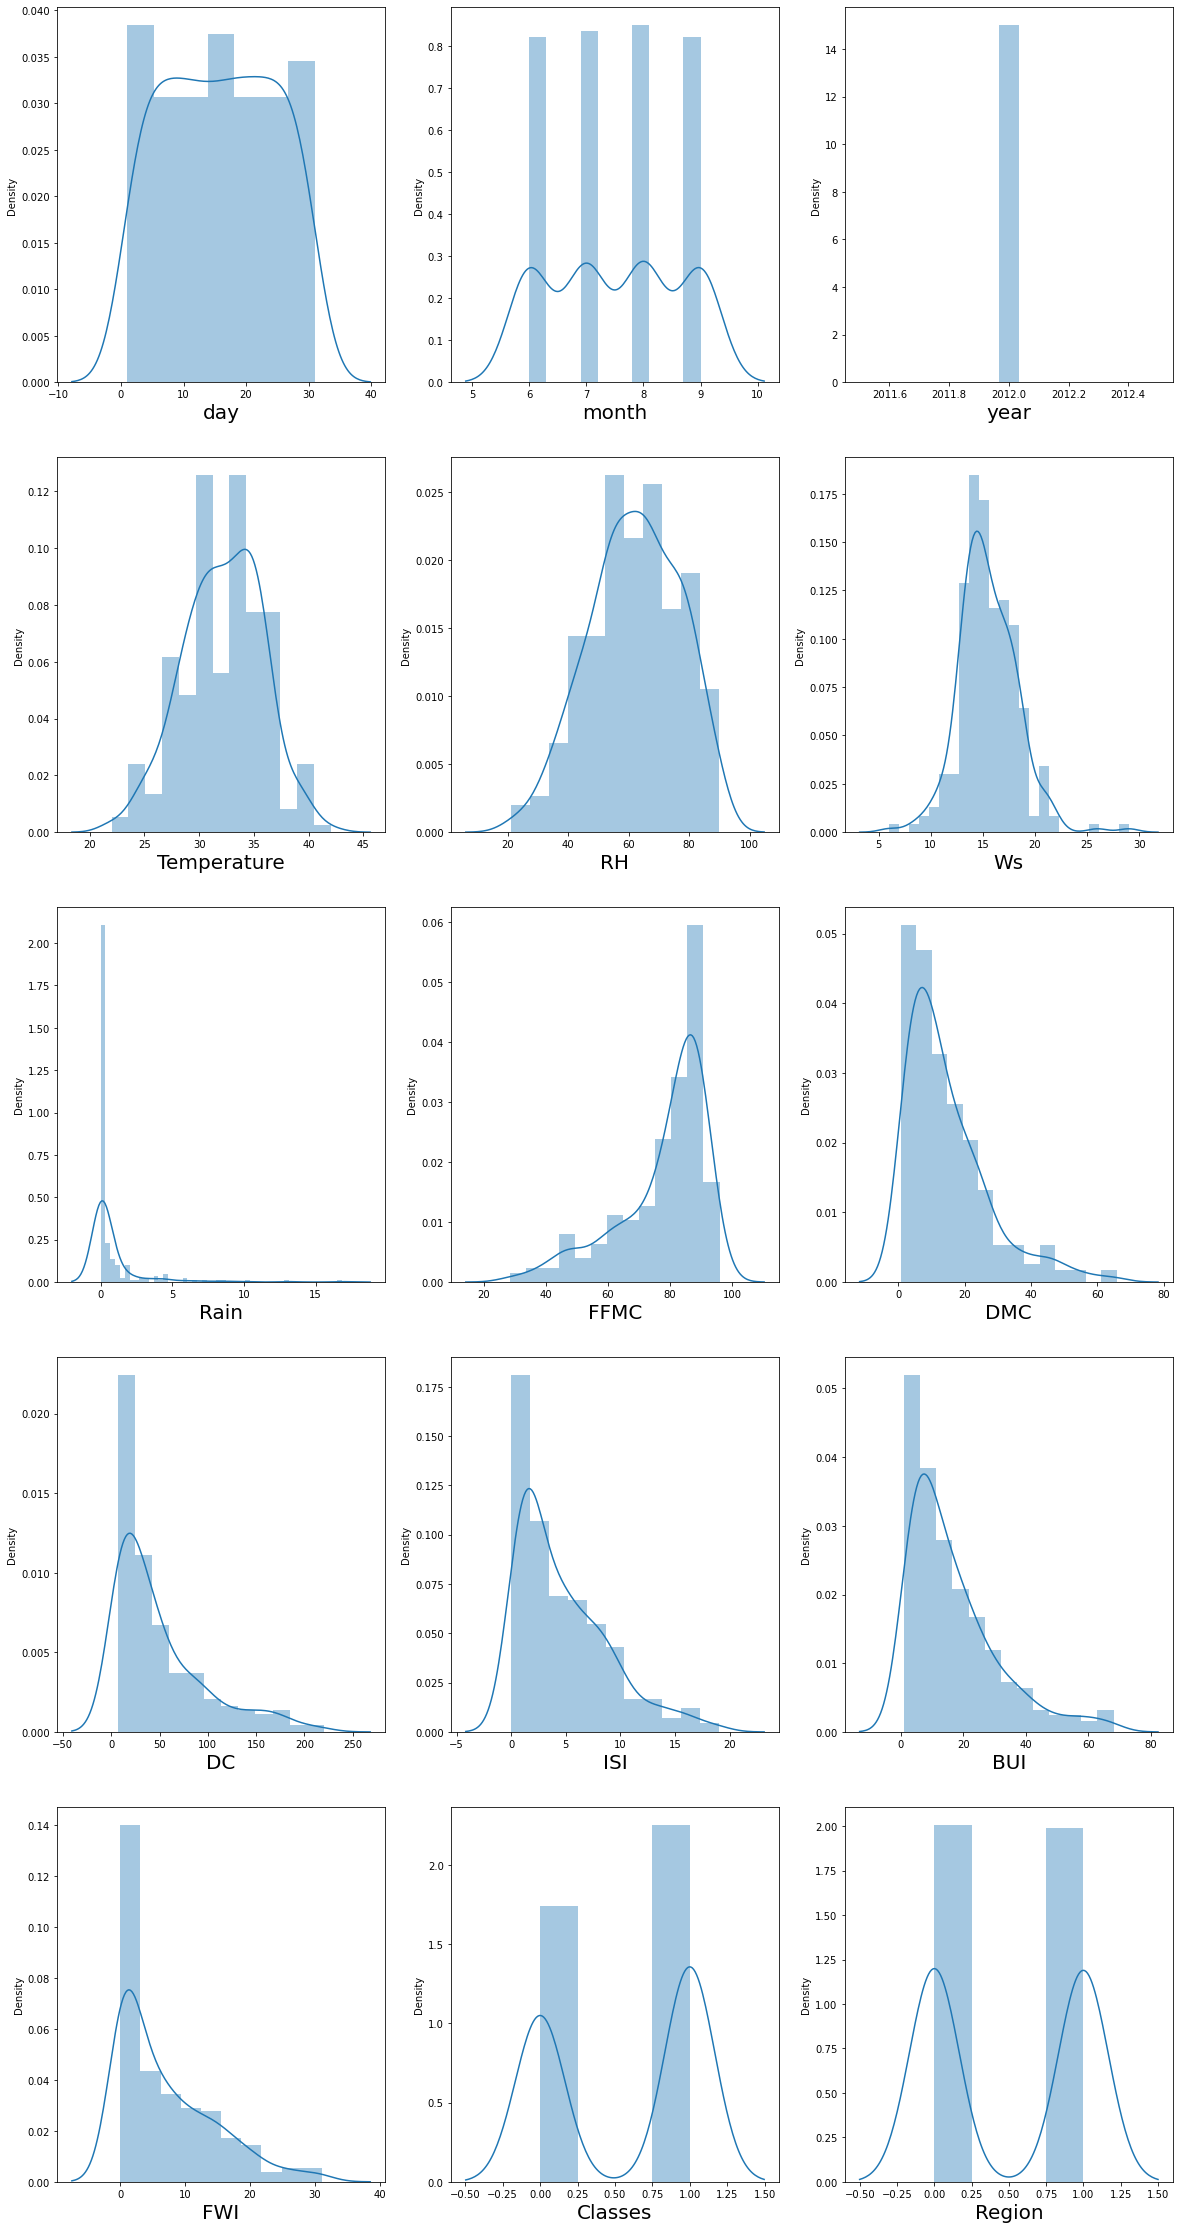

In [26]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <= 15 :     # as there are 15 columns in the data
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(data[column],kde= True)
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

- Rain, DMC, DC, FWI, ISI, BUI are rightly skewed (log normal distribution)
- There is no variance in the year attribute

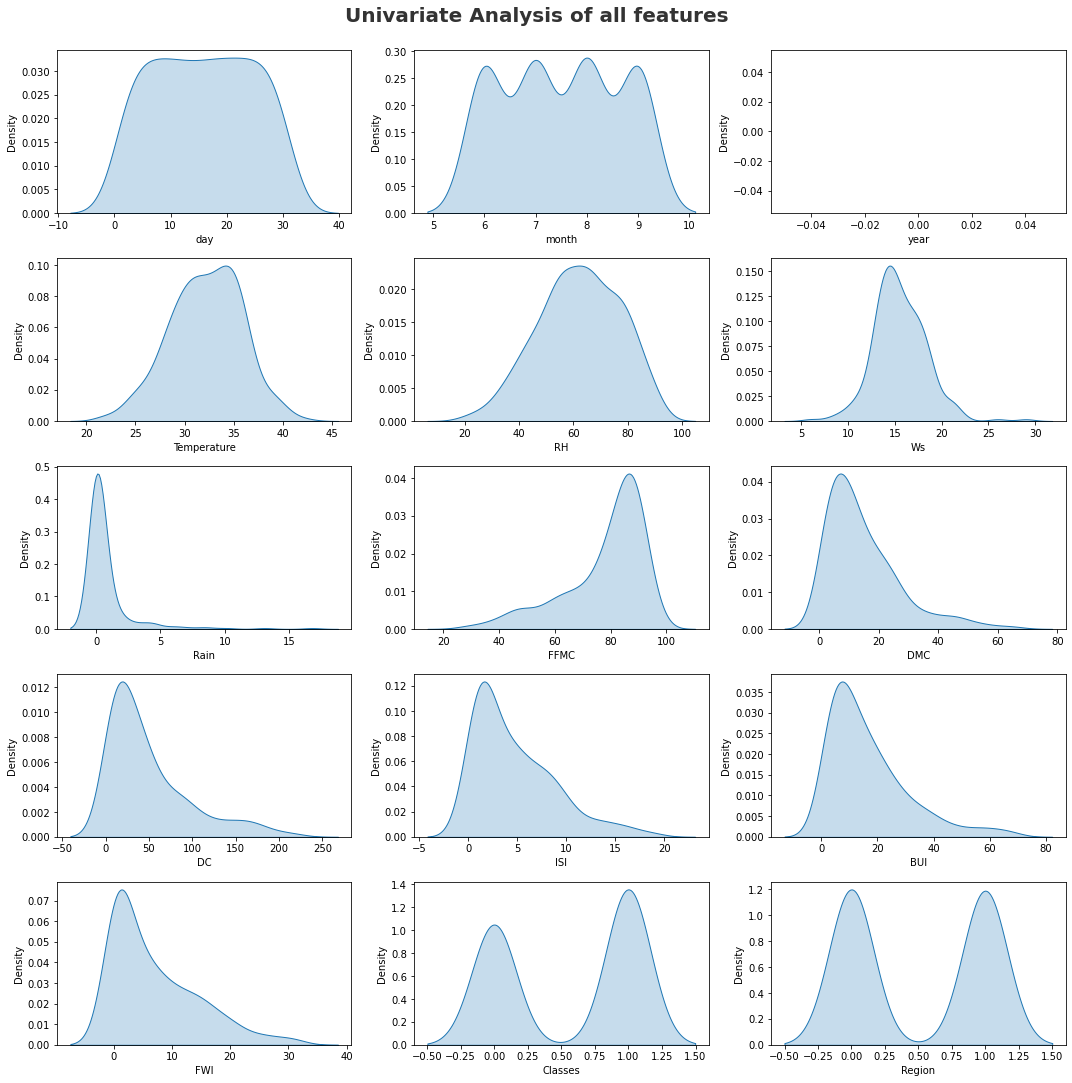

In [27]:
#Univariate Analysis
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of all features', fontsize = 20, fontweight = "bold", alpha = 0.8, y = 1.)

for i in range(0, len(data.columns)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(data[data.columns[i]], shade =True, palette="ch:s=.25,rot=-.25")
    plt.xlabel(data.columns[i])
    plt.tight_layout()

<Figure size 1080x1080 with 0 Axes>

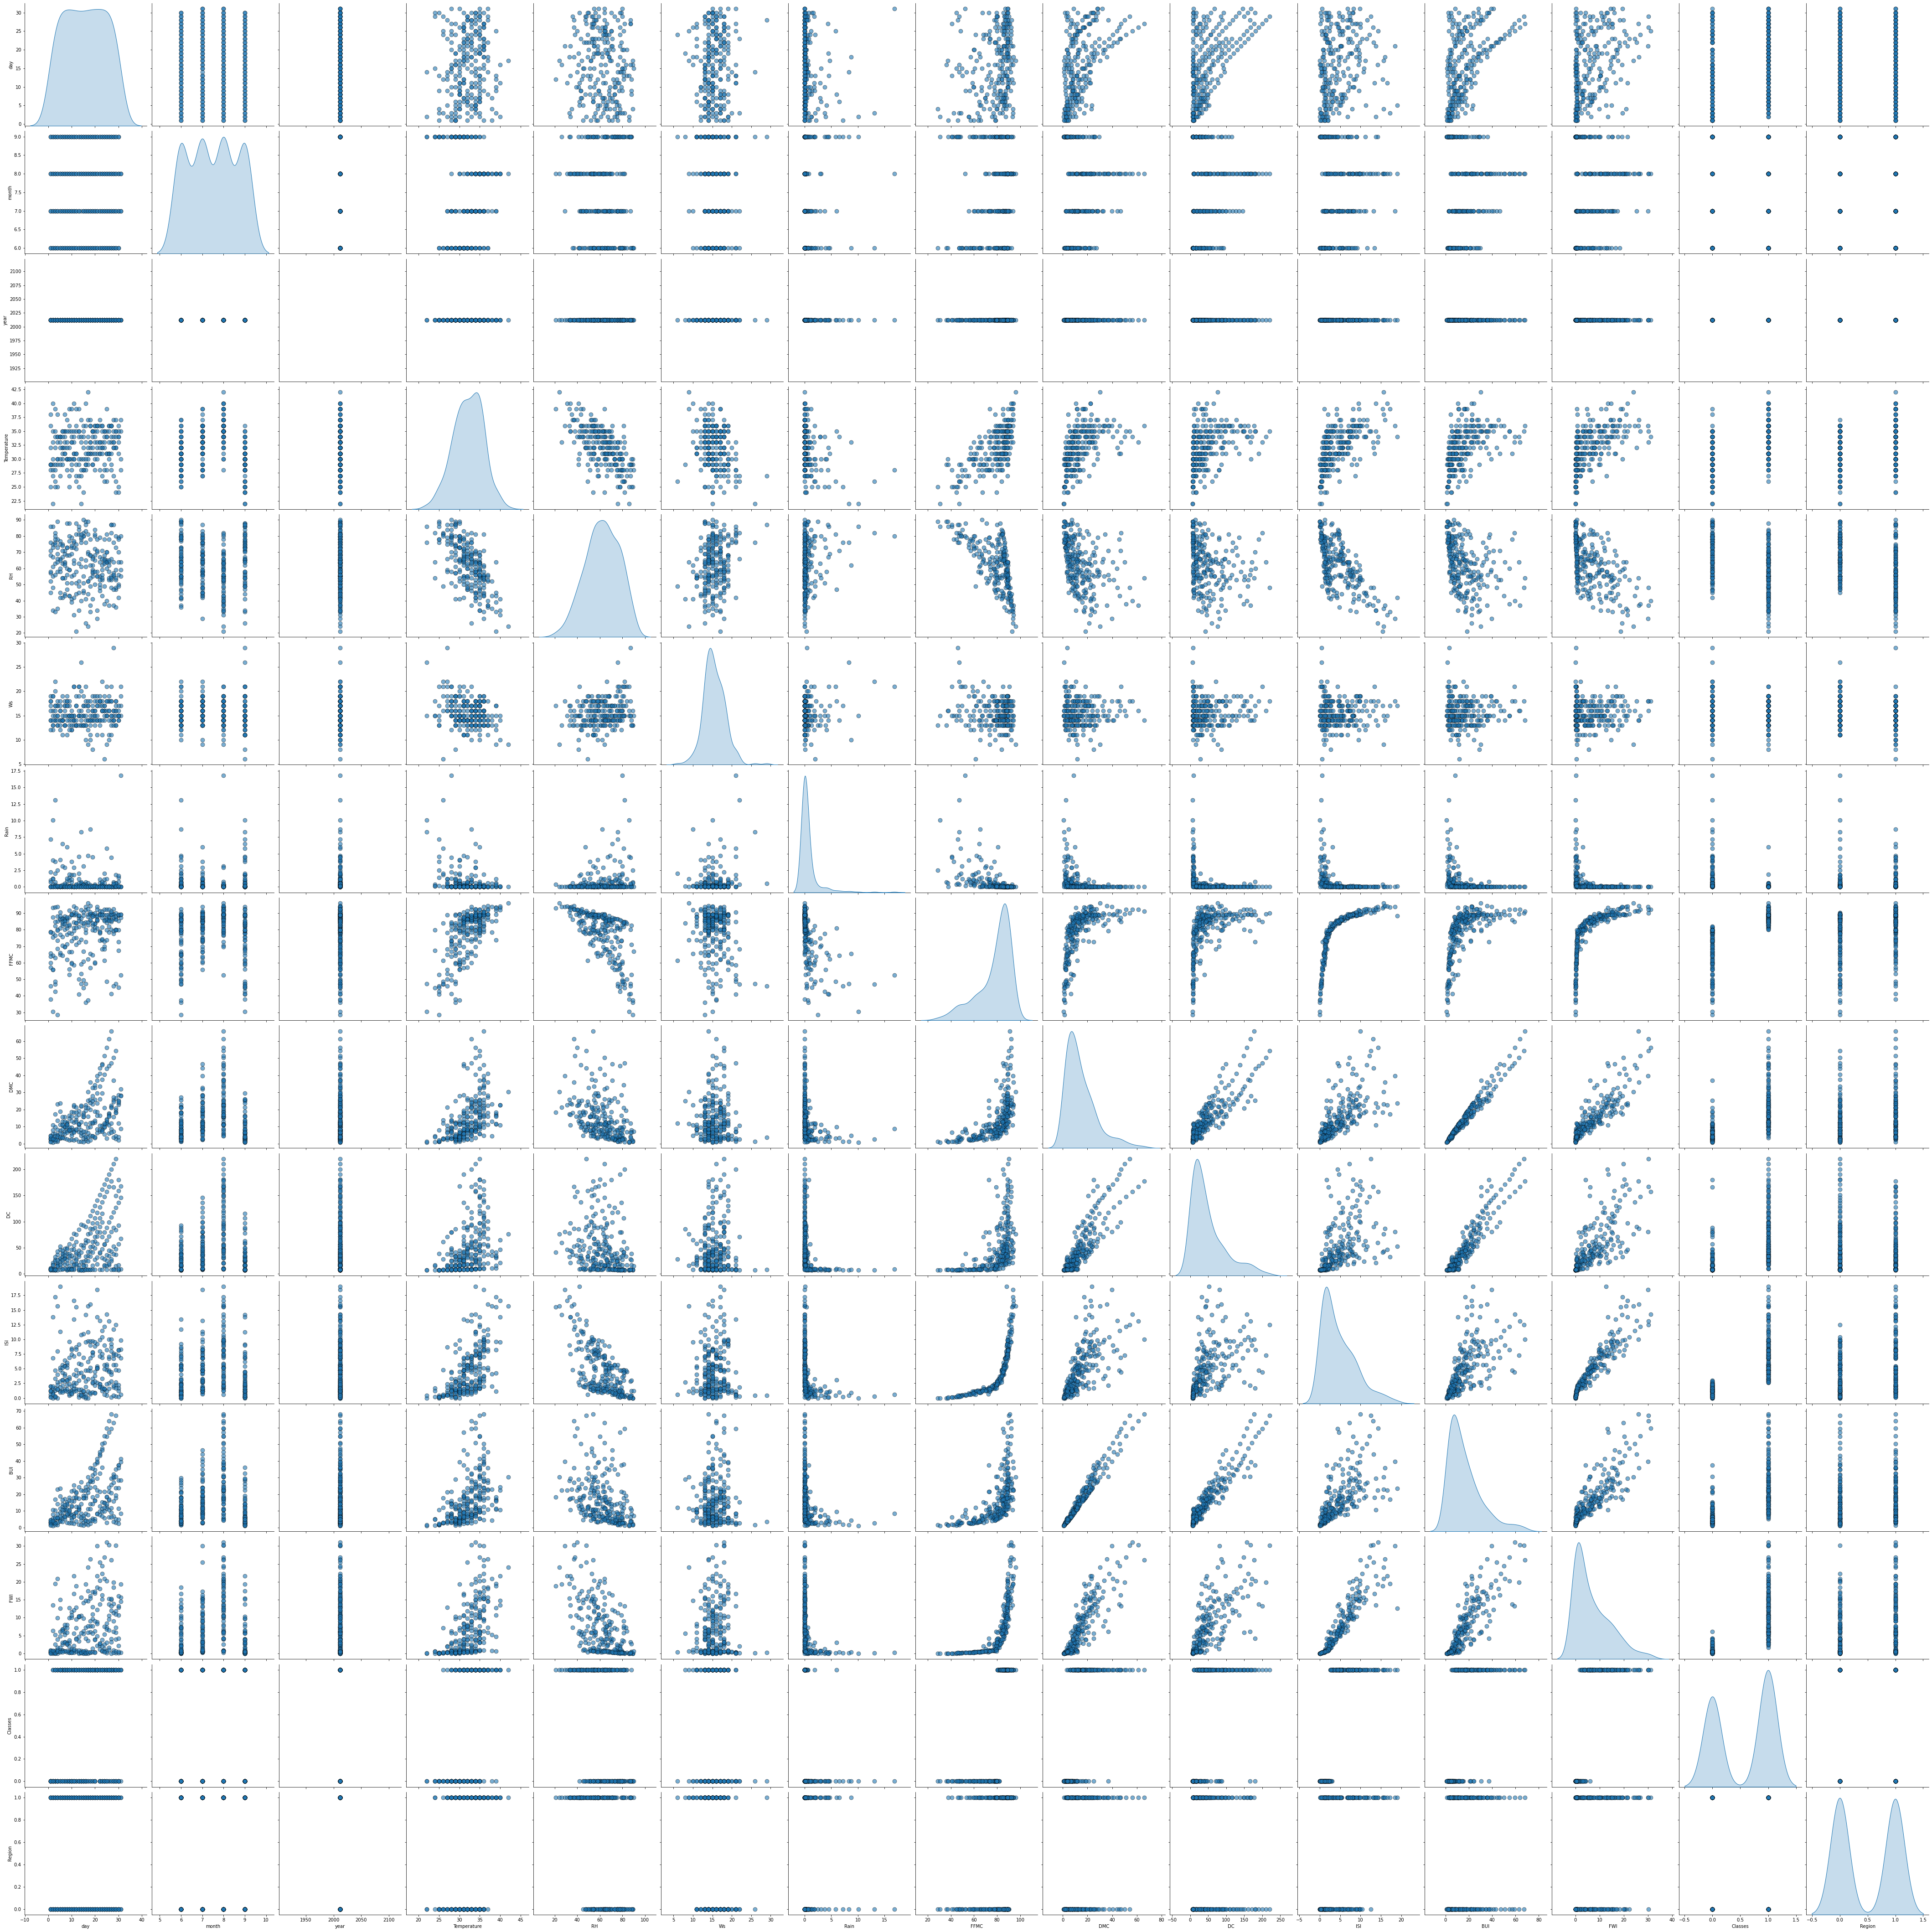

In [28]:
#Multivariate Analysis
plt.figure(figsize=(15,15))
plt.suptitle('Multivariate Analysis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.pairplot(data,  diag_kind = 'kde',palette="ch:s=.25,rot=-.25",
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

In [29]:
## Drop Year columns
data.drop("year", axis = 1, inplace = True)

<AxesSubplot:>

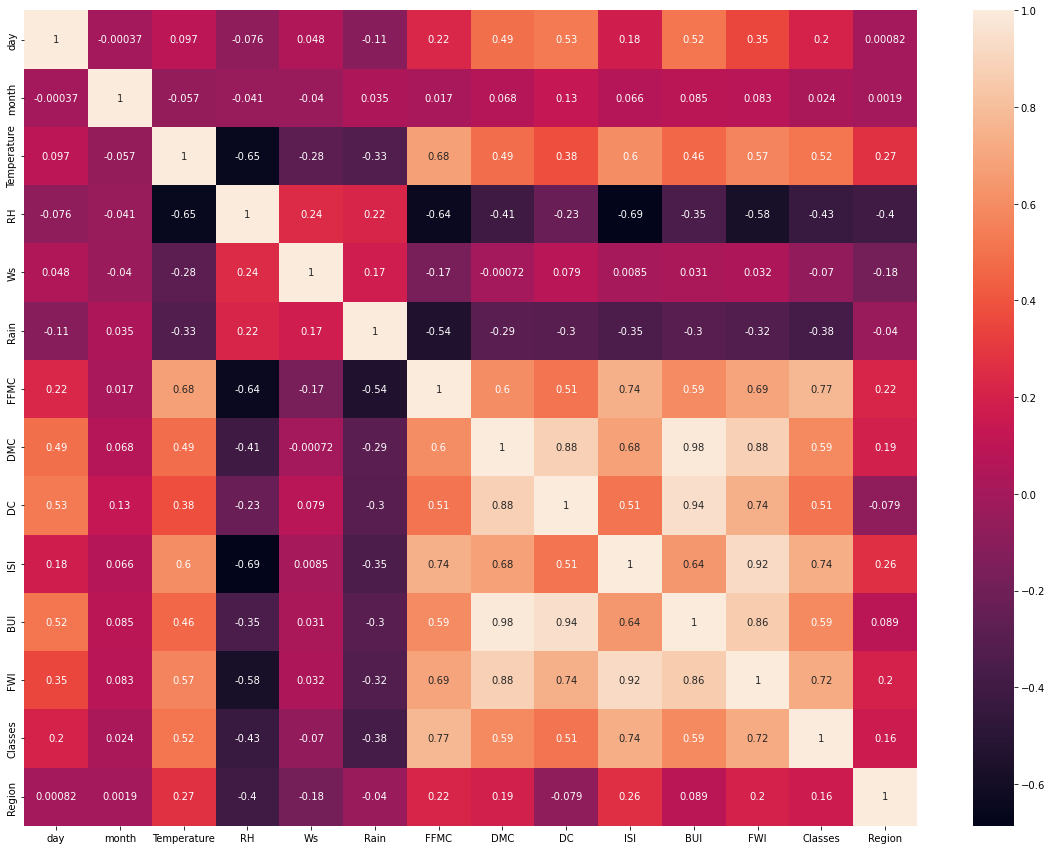

In [30]:
#Heatmap of Correlation
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(),annot = True)

In [31]:
#Visualisation of Target Feature
data['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

<AxesSubplot:xlabel='Region', ylabel='Classes'>

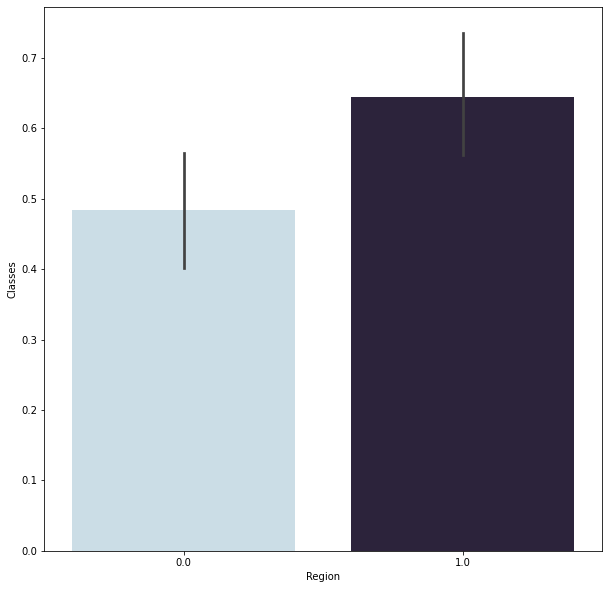

In [32]:
plt.figure(figsize = (10,10))
sns.barplot(x= 'Region', y = 'Classes', data= data, palette="ch:s=.25,rot=-.25")

- Sidi-Bel Abbes region has most of the fire happen

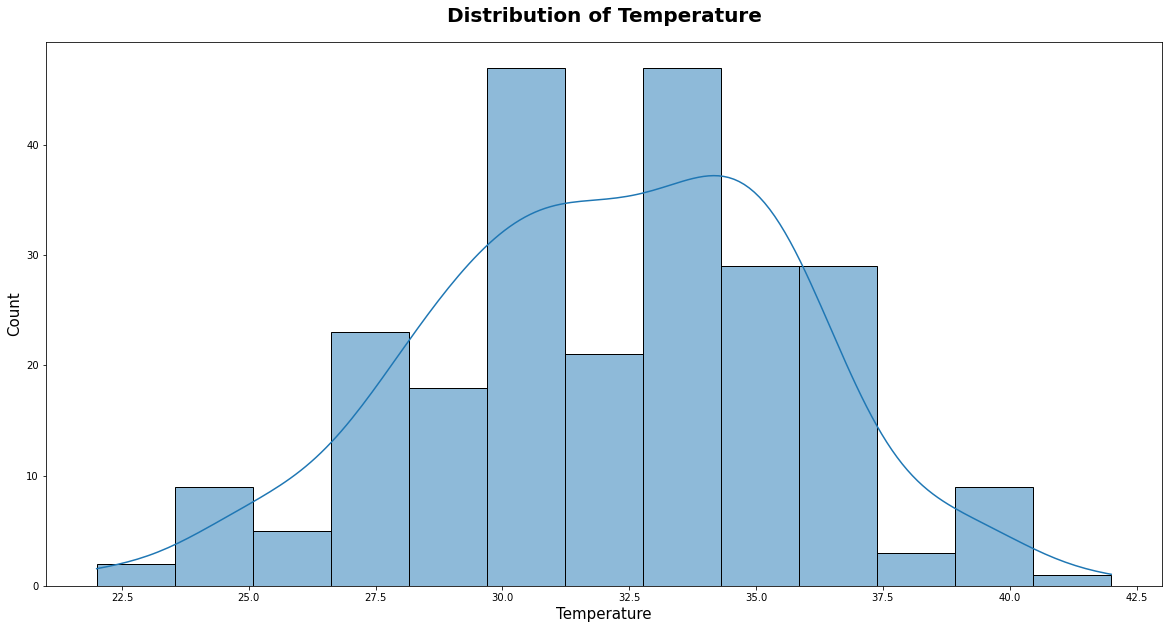

In [33]:
#Visualisation of Temperature Feature
plt.figure(figsize = (20,10))
sns.histplot(data['Temperature'],kde = True, palette="ch:s=.25,rot=-.25")
plt.title("Distribution of Temperature",weight = 'bold',fontsize=20,pad=20)
plt.xlabel("Temperature",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

- Temperature occur most of the time in range 32.5 to 35.0

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

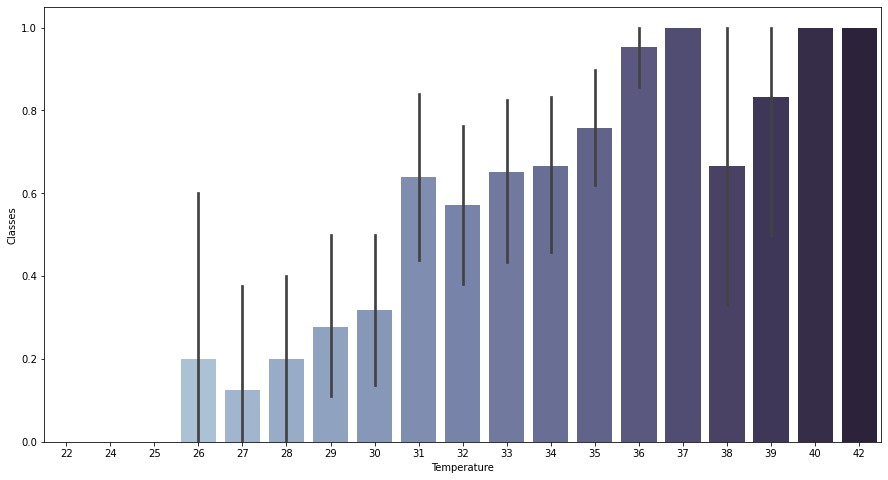

In [34]:
#Highest Temperature Attained
plt.figure(figsize = (15,8))
sns.barplot(x="Temperature",y="Classes",data=data, palette="ch:s=.25,rot=-.25")

- Highest Temperature is 37,40 and 42

<AxesSubplot:xlabel='Region', ylabel='Rain'>

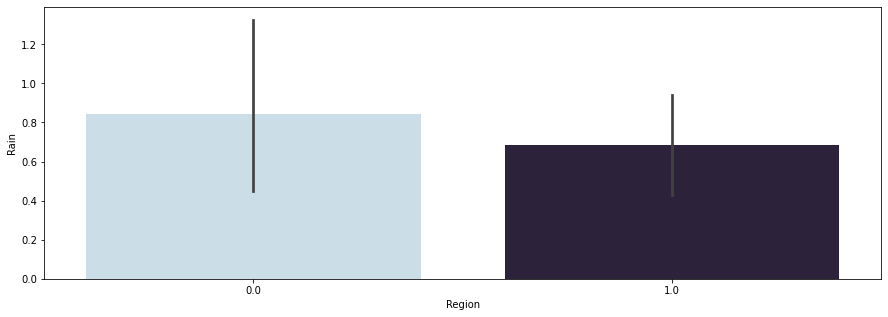

In [35]:
#Which region is mostly effected by rain
plt.figure(figsize = (15,5))
sns.barplot(x = data['Region'], y = data['Rain'], palette="ch:s=.25,rot=-.25")

- Bejaia region is the region in which most of the time rain happens

<AxesSubplot:xlabel='Region', ylabel='Temperature'>

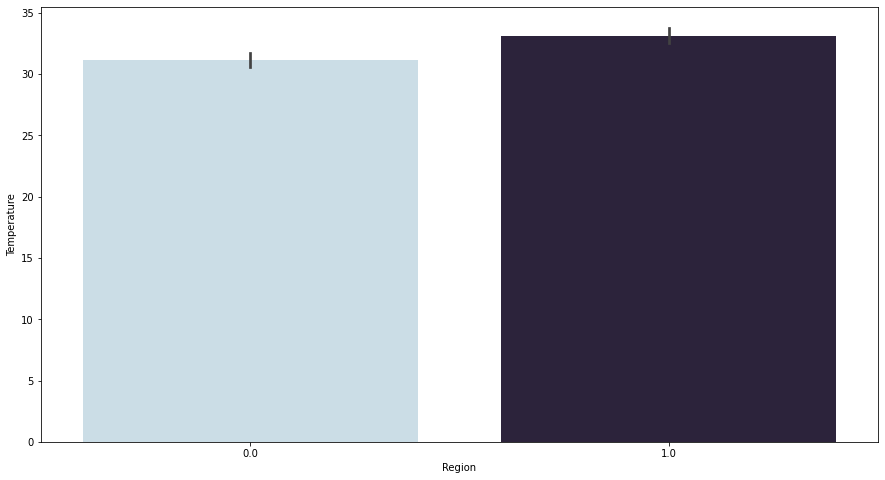

In [36]:
#Which region is mostly effected by Temperature
plt.figure(figsize = (15,8))
sns.barplot(x = data['Region'], y = data['Temperature'], palette="ch:s=.25,rot=-.25")

- Sidi - Bel Abbes region mostly effected by temperature

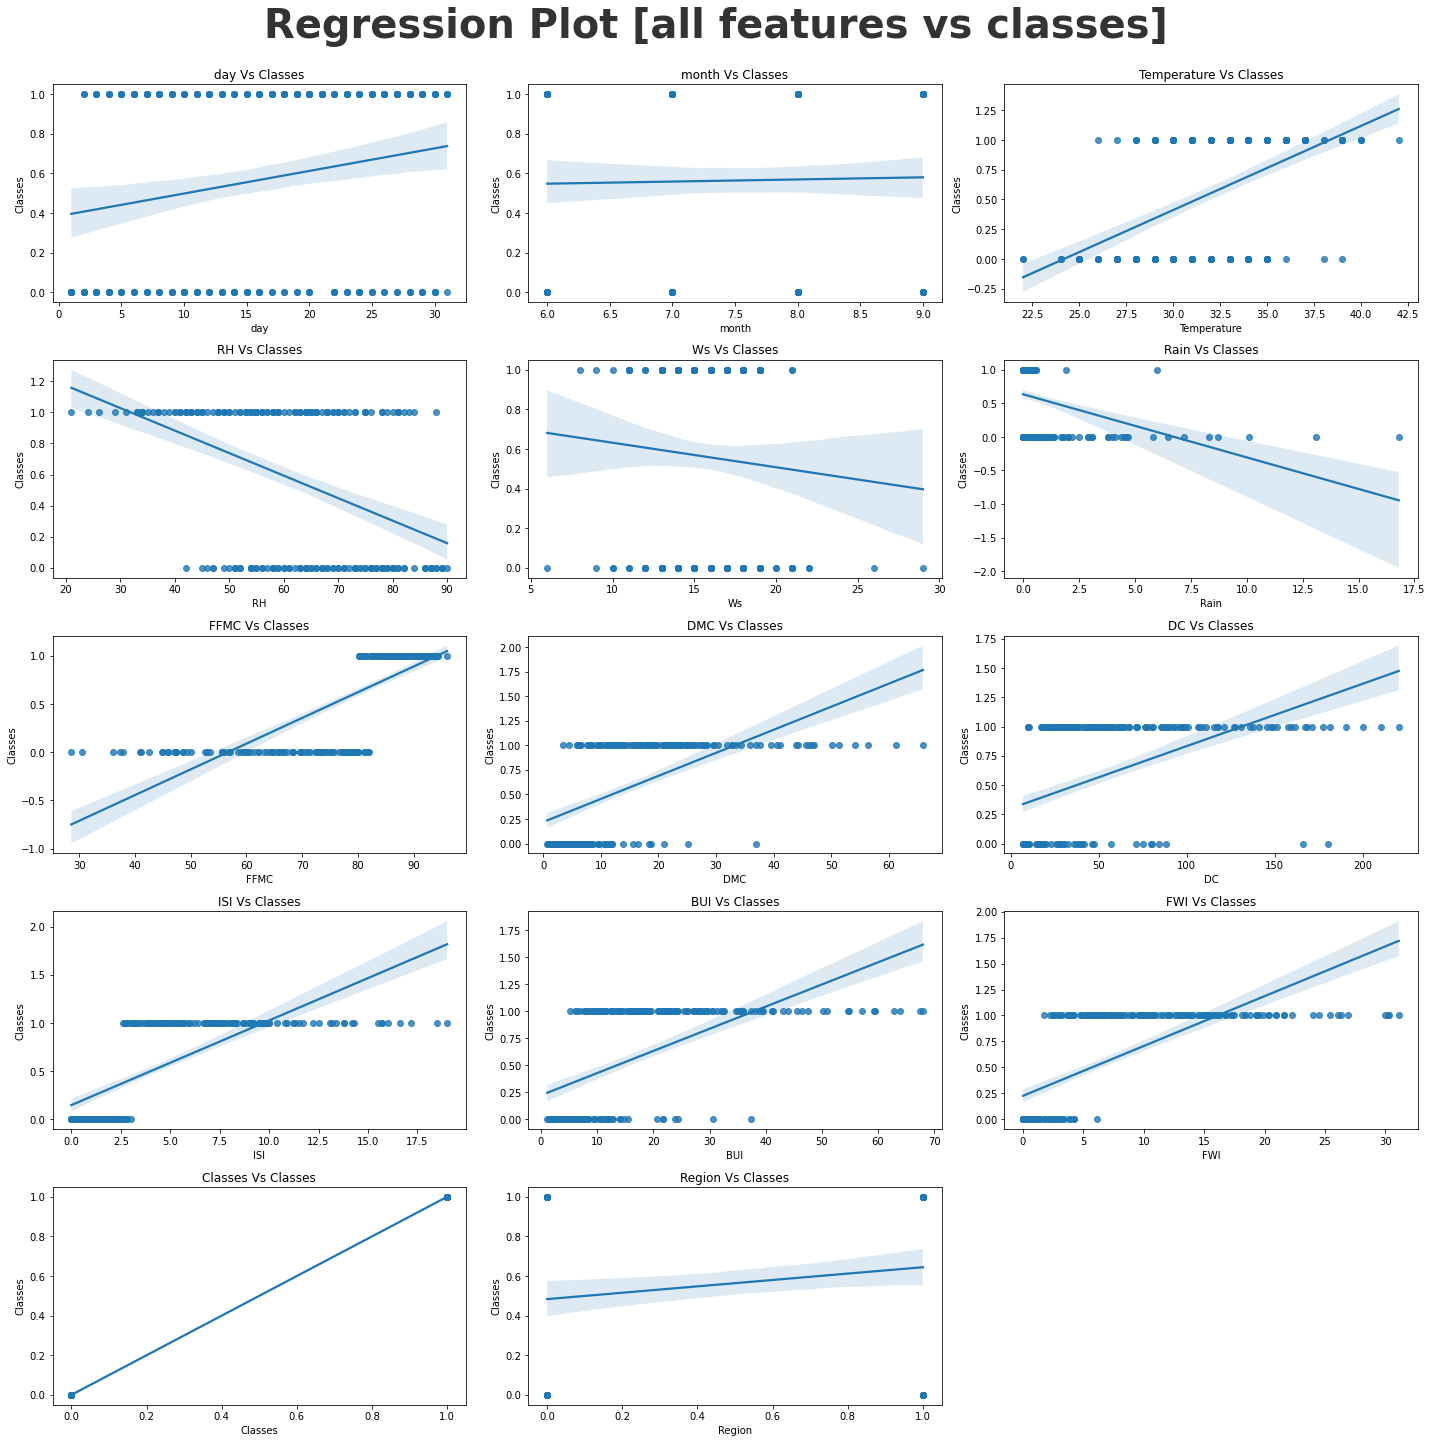

In [37]:
#Regression Plot
plt.figure(figsize = (20,20))
plt.suptitle('Regression Plot [all features vs classes]', fontsize = 40, fontweight = "bold", alpha = 0.8, y = 1.)

for i in range(0, len(data.columns)):
    plt.subplot(5,3,i+1)
    sns.regplot(x= data[data.columns[i]],y = data['Classes'], data = data)
    plt.xlabel(data.columns[i])
    plt.ylabel("Classes")
    plt.title("{} Vs Classes".format(data.columns[i]))
    plt.tight_layout()

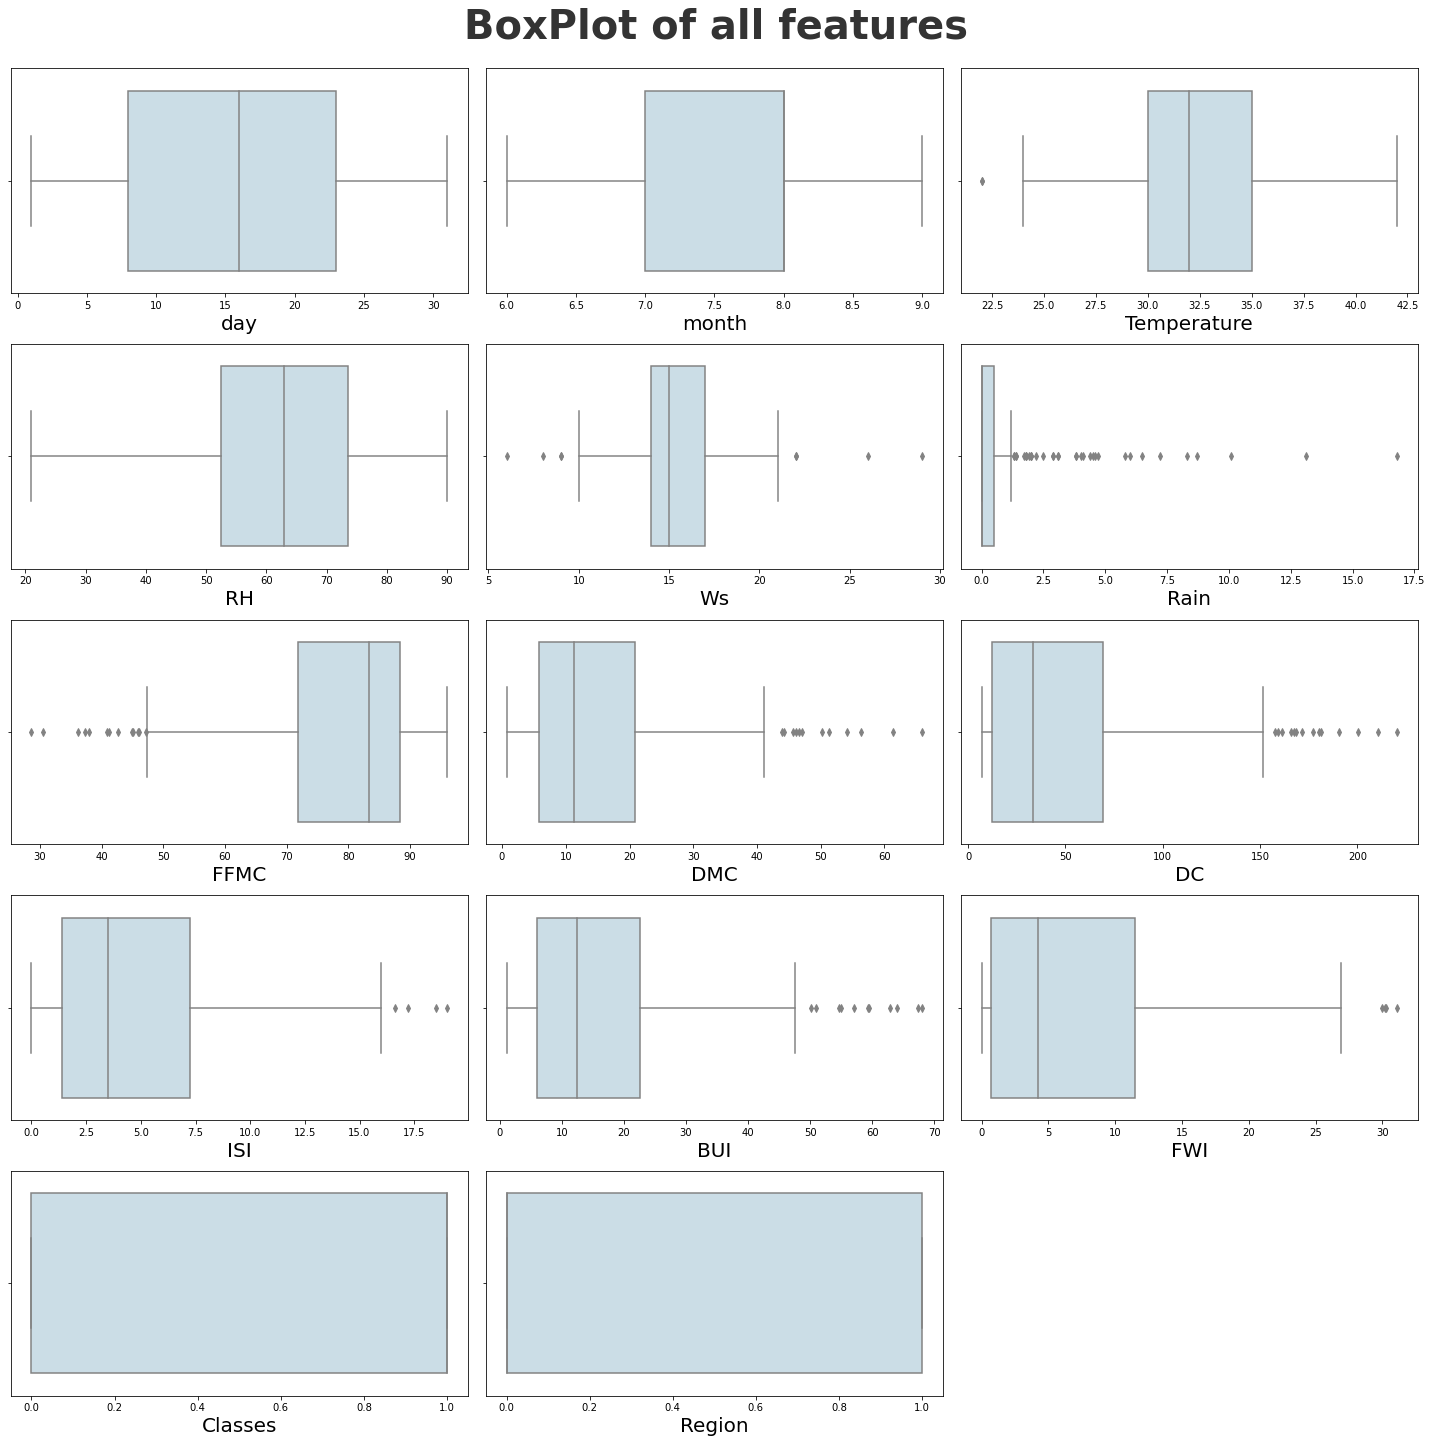

In [38]:
#Boxplot to find outliers
plt.figure(figsize = (20,20))
plt.suptitle('BoxPlot of all features', fontsize = 40, fontweight = "bold", alpha = 0.8, y = 1.)

for i in range(0, len(data.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x= data[data.columns[i]], data = data, palette="ch:s=.25,rot=-.25")
    plt.xlabel(data.columns[i],fontsize = 20)
    #plt.ylabel("Classes")
    #plt.title("{} .format(data.columns[i]))
    plt.tight_layout()

- Ws, Rain, FFMC, DMC,DC, BUI has many outliers

In [39]:
from tqdm import tqdm
def find_boundaries(data,column):
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    lower_boundary = data[column].quantile(0.25) - (1.5 * IQR)
    higher_boundary = data[column].quantile(0.75) + (1.5 * IQR)
    print(column, "---", "IQR --->",IQR)
    print("Lower Boundary:",lower_boundary)
    print("Higher Boundary:",  higher_boundary)
    print("-" * 30)
    data.loc[data[column] <= lower_boundary, column] = lower_boundary
    data.loc[data[column] >= higher_boundary, column] =  higher_boundary

In [40]:
for column in tqdm(data.columns):
    find_boundaries(data, column)

100%|█████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 170.35it/s]

day --- IQR ---> 15.0
Lower Boundary: -14.5
Higher Boundary: 45.5
------------------------------
month --- IQR ---> 1.0
Lower Boundary: 5.5
Higher Boundary: 9.5
------------------------------
Temperature --- IQR ---> 5.0
Lower Boundary: 22.5
Higher Boundary: 42.5
------------------------------
RH --- IQR ---> 21.0
Lower Boundary: 21.0
Higher Boundary: 105.0
------------------------------
Ws --- IQR ---> 3.0
Lower Boundary: 9.5
Higher Boundary: 21.5
------------------------------
Rain --- IQR ---> 0.5
Lower Boundary: -0.75
Higher Boundary: 1.25
------------------------------
FFMC --- IQR ---> 16.450000000000003
Lower Boundary: 47.17499999999999
Higher Boundary: 112.975
------------------------------
DMC --- IQR ---> 14.999999999999996
Lower Boundary: -16.699999999999992
Higher Boundary: 43.29999999999999
------------------------------
DC --- IQR ---> 56.74999999999999
Lower Boundary: -72.77499999999999
Higher Boundary: 154.22499999999997
------------------------------
ISI --- IQR ---> 5

## We should see a progress bar for each column.Each update of the progress bar should correspond to a step in the find_boundaries() function.

In [41]:
def find_boundaries(data, column):
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    lower_boundary = data[column].quantile(0.25) - (1.5 * IQR)
    higher_boundary = data[column].quantile(0.75) + (1.5 * IQR)
    with tqdm(total=2) as pbar: # Initialize progress bar with a total of 2 updates
        pbar.set_description(f'Processing {column}') # Update progress bar description
        pbar.update(1) # Update progress bar with first update
        print(column, "---", "IQR --->", IQR)
        print("Lower Boundary:", lower_boundary)
        print("Higher Boundary:", higher_boundary)
        print("-" * 30)
        data.loc[data[column] <= lower_boundary, column] = lower_boundary
        data.loc[data[column] >= higher_boundary, column] = higher_boundary
        pbar.update(1) # Update progress bar with second update

for column in data.columns:
    find_boundaries(data, column)

Processing day: 100%|████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


day --- IQR ---> 15.0
Lower Boundary: -14.5
Higher Boundary: 45.5
------------------------------


Processing month: 100%|████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 1000.91it/s]


month --- IQR ---> 1.0
Lower Boundary: 5.5
Higher Boundary: 9.5
------------------------------


Processing Temperature: 100%|███████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.09it/s]


Temperature --- IQR ---> 5.0
Lower Boundary: 22.5
Higher Boundary: 42.5
------------------------------


Processing RH: 100%|████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.98it/s]


RH --- IQR ---> 21.0
Lower Boundary: 21.0
Higher Boundary: 105.0
------------------------------


Processing Ws: 100%|████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.14it/s]


Ws --- IQR ---> 3.0
Lower Boundary: 9.5
Higher Boundary: 21.5
------------------------------


Processing Rain: 100%|██████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.19it/s]


Rain --- IQR ---> 0.5
Lower Boundary: -0.75
Higher Boundary: 1.25
------------------------------


Processing FFMC: 100%|██████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 177.08it/s]


FFMC --- IQR ---> 16.450000000000003
Lower Boundary: 47.17499999999999
Higher Boundary: 112.975
------------------------------


Processing DMC: 100%|███████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 241.73it/s]


DMC --- IQR ---> 14.999999999999996
Lower Boundary: -16.699999999999992
Higher Boundary: 43.29999999999999
------------------------------


Processing DC: 100%|████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.19it/s]


DC --- IQR ---> 56.74999999999999
Lower Boundary: -72.77499999999999
Higher Boundary: 154.22499999999997
------------------------------


Processing ISI: 100%|███████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.93it/s]


ISI --- IQR ---> 5.85
Lower Boundary: -7.374999999999998
Higher Boundary: 16.025
------------------------------


Processing BUI: 100%|███████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 663.55it/s]


BUI --- IQR ---> 16.65
Lower Boundary: -18.974999999999998
Higher Boundary: 47.625
------------------------------


Processing FWI: 100%|███████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.19it/s]


FWI --- IQR ---> 10.75
Lower Boundary: -15.425
Higher Boundary: 27.575
------------------------------


Processing Classes: 100%|███████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.09it/s]


Classes --- IQR ---> 1.0
Lower Boundary: -1.5
Higher Boundary: 2.5
------------------------------


Processing Region: 100%|████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 667.14it/s]

Region --- IQR ---> 1.0
Lower Boundary: -1.5
Higher Boundary: 2.5
------------------------------


<AxesSubplot:>

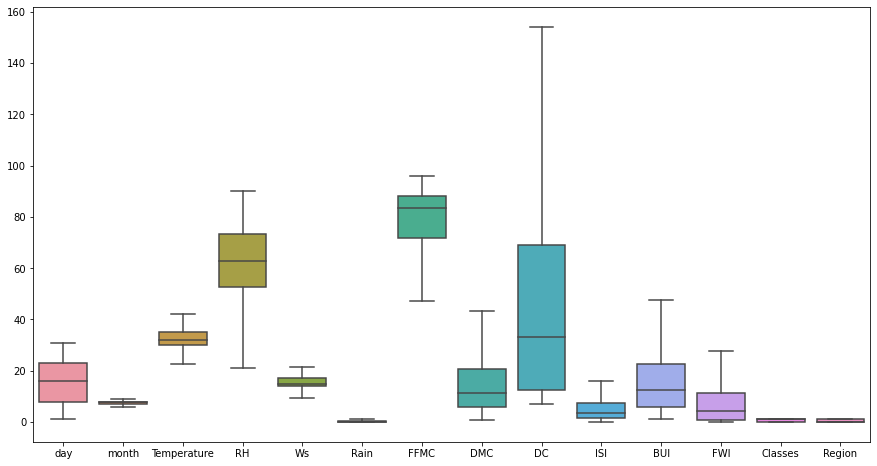

In [42]:
#Rechecking the outliers after dropping it
plt.figure(figsize = (15,8))
sns.boxplot(data = data)

- Outlier is not present in any of the feature

In [43]:
#Creating Independent and Dependent Features
X = data.drop(columns = ['Classes'])
y = data['Classes']

In [44]:
#Independent Features
X.head()

day  month  Temperature  RH    Ws  Rain    FFMC  DMC    DC  ISI  BUI  FWI  \
0  1.0    6.0         29.0  57  18.0  0.00  65.700  3.4   7.6  1.3  3.4  0.5   
1  2.0    6.0         29.0  61  13.0  1.25  64.400  4.1   7.6  1.0  3.9  0.4   
2  3.0    6.0         26.0  82  21.5  1.25  47.175  2.5   7.1  0.3  2.7  0.1   
3  4.0    6.0         25.0  89  13.0  1.25  47.175  1.3   6.9  0.0  1.7  0.0   
4  5.0    6.0         27.0  77  16.0  0.00  64.800  3.0  14.2  1.2  3.9  0.5   

   Region  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [45]:
#Dependent Features
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Classes, dtype: float64

## Importing sklearn libraries for machine learning.

In [46]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

## Train Test Split.

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## Logistic Regression Model Training.

In [48]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [49]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [50]:
classifier_regressor = GridSearchCV(classifier, param_grid=parameter, scoring='accuracy', cv=5)

## Standardizing or Feature Selection.

In [51]:
classifier_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [52]:
print(classifier_regressor.best_params_)

{'C': 5, 'max_iter': 100, 'penalty': 'l2'}


In [53]:
print(classifier_regressor.best_score_)

0.9647058823529411


## Prediction

In [54]:
y_pred = classifier_regressor.predict(X_test)
y_pred

array([1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1.])

## Accuracy Score

In [55]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_pred, y_test)
print(score)

0.958904109589041


## Classification Report

In [56]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95        28
         1.0       0.98      0.96      0.97        45

    accuracy                           0.96        73
   macro avg       0.95      0.96      0.96        73
weighted avg       0.96      0.96      0.96        73



# Performance Metrics

## Confusion Matrix

In [57]:
conf_Max = confusion_matrix(y_pred,y_test)
conf_Max

array([[27,  1],
       [ 2, 43]], dtype=int64)

In [58]:
true_positive = conf_Max[0][0]
false_positive = conf_Max[0][1]
false_negative = conf_Max[1][0]
true_negative = conf_Max[1][1]

print(f' True Positive(TP):{true_positive}')
print(f'False Positive(FP):{false_positive}')
print(f' True Negative(TN):{true_negative}')
print(f'False Negative(FN):{false_negative}')

 True Positive(TP):27
False Positive(FP):1
 True Negative(TN):43
False Negative(FN):2


## Calculate using theorical formula of Accuracy, Precision, Recall, F1-score

In [59]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.958904109589041

## Precision

In [60]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9642857142857143

## Recall

In [61]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9310344827586207

## F1-Score

In [62]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9473684210526316

## Area Under Curve(AUC)

In [63]:
auc = roc_auc_score(y_pred, y_test)
auc

0.9599206349206351

## Receiver Operating Characteristic(ROC)

- ROC is a graphical plot that shows the performance of a binary classifier system as its discrimination threshold is varied. 

- The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold   settings.

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

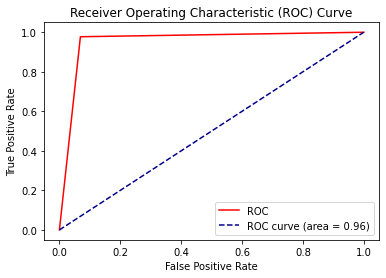

In [65]:
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

- In real life, we create various models using different algorithms that we can use for classification purpose. 

- We use AUC to determine which model is the best one to use for a given dataset. 

- Suppose we have created Logistic regression, SVM as well as a clustering model for classification purpose. 

- We will calculate AUC for all the models seperately. The model with highest AUC value will be the best model to use.

## Creating Inbalance dataset from the original balanced dataset

In [66]:
df.shape

(243, 15)

In [67]:
# creating imbalance
# Splitting data in 9:1 percent ratio using train test split

X1 = pd.DataFrame(df, columns = ['day', 'month','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Region'])
y1 = pd.DataFrame(df, columns = ['Classes'])

In [68]:
df.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes  Region  
0  0.5        0     0.0  
1  0.4        0     0.0  
2  0.1        0     0.0  
3  0.0        0     0.0  
4  0.5        0     0.0

In [69]:
y1.head()

Classes
0        0
1        0
2        0
3        0
4        0

In [70]:
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X1, y1, test_size=0.10, random_state=17)

In [71]:
#Both will have same shape
X_train_imb.shape, y_train_imb.shape

((218, 13), (218, 1))

### Replacing all values as 1(One) in y_train and all values as 0(zero) in y_test to create imbalance.

In [72]:
y_train_imb = y_train_imb.replace(0,1)
y_train_imb.head()

Classes
158        1
186        1
11         1
75         1
132        1

In [73]:
y_train_imb = y_train_imb.replace(0,1)
y_train_imb.head()

Classes
158        1
186        1
11         1
75         1
132        1

In [74]:
X_train_imb.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
158    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7   
186    2      8           40  34  14   0.0  93.3  10.8  21.4  13.8  10.6   
11    12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   
75    15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   
132    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   

      FWI  Region  
158  15.0     1.0  
186  13.5     1.0  
11    7.1     0.0  
75    6.3     0.0  
132   1.9     1.0

In [75]:
# combining X_train_imb and y_train_imb
train_imb = X_train_imb.join(pd.DataFrame(y_train_imb))
train_imb.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
158    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7   
186    2      8           40  34  14   0.0  93.3  10.8  21.4  13.8  10.6   
11    12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   
75    15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   
132    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   

      FWI  Region  Classes  
158  15.0     1.0        1  
186  13.5     1.0        1  
11    7.1     0.0        1  
75    6.3     0.0        1  
132   1.9     1.0        1

In [76]:
# combining X_test_imb with y_test_imb
test_imb = X_test_imb.join(pd.DataFrame(y_test_imb))

In [77]:
test_imb.shape, train_imb.shape

((25, 14), (218, 14))

In [78]:
# combining train_imb dataset and test_imb dataset into data_imb dataset
df_imb = pd.concat([train_imb, test_imb], ignore_index  = True, sort=False)
df_imb.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI   FWI  \
0    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7  15.0   
1    2      8           40  34  14   0.0  93.3  10.8  21.4  13.8  10.6  13.5   
2   12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   7.1   
3   15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   6.3   
4    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   1.9   

   Region  Classes  
0     1.0        1  
1     1.0        1  
2     0.0        1  
3     0.0        1  
4     1.0        1

## Checking the inbalancing

In [79]:
df_imb.Classes.value_counts()

1    233
0     10
Name: Classes, dtype: int64

<AxesSubplot:xlabel='Classes', ylabel='count'>

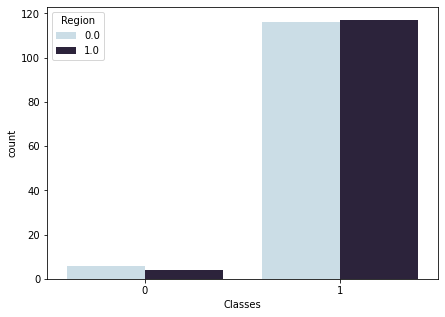

In [80]:
# 0: 'Bejaia region' and 1: 'Sidi Bel-abbes region'
plt.figure(figsize=(7,5))
sns.countplot(data = df_imb, x='Classes', hue='Region',palette="ch:s=.25,rot=-.25")

## Logistic regression on imbalance data

In [81]:
# Seperating Independent and Dependent Feature
y1 = df_imb['Classes']
X1 = df_imb.drop(columns='Classes')

In [82]:
# Handling Inmbalance dataset by doing Upsampling

#for Upsampling
from imblearn.combine import SMOTETomek

In [83]:
smk = SMOTETomek()
smk

SMOTETomek()

In [84]:
X_bal, y_bal = smk.fit_resample(X1, y1)

In [85]:
X_bal.shape,y_bal.shape

((464, 13), (464,))

In [86]:
#Creating balanced data from imbalanced data
data_bal = X_bal.join(pd.DataFrame(y_bal))
data_bal.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI   FWI  \
0    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7  15.0   
1    2      8           40  34  14   0.0  93.3  10.8  21.4  13.8  10.6  13.5   
2   12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   7.1   
3   15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   6.3   
4    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   1.9   

   Region  Classes  
0     1.0        1  
1     1.0        1  
2     0.0        1  
3     0.0        1  
4     1.0        1

## EDA on balanced dataset

In [87]:
data_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          464 non-null    int64  
 1   month        464 non-null    int64  
 2   Temperature  464 non-null    int64  
 3   RH           464 non-null    int64  
 4   Ws           464 non-null    int64  
 5   Rain         464 non-null    float64
 6   FFMC         464 non-null    float64
 7   DMC          464 non-null    float64
 8   DC           464 non-null    float64
 9   ISI          464 non-null    float64
 10  BUI          464 non-null    float64
 11  FWI          464 non-null    float64
 12  Region       464 non-null    float64
 13  Classes      464 non-null    int64  
dtypes: float64(8), int64(6)
memory usage: 50.9 KB


## Statistical analysis on balanced dataset

In [88]:
data_bal.describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

In [89]:
data_bal.corr()

day     month  Temperature        RH        Ws      Rain  \
day          1.000000 -0.174357     0.284218 -0.231158  0.004891 -0.051280   
month       -0.174357  1.000000    -0.136271  0.159956 -0.022556 -0.009025   
Temperature  0.284218 -0.136271     1.000000 -0.596792 -0.295877 -0.203425   
RH          -0.231158  0.159956    -0.596792  1.000000  0.063385  0.177270   
Ws           0.004891 -0.022556    -0.295877  0.063385  1.000000  0.078535   
Rain        -0.051280 -0.009025    -0.203425  0.177270  0.078535  1.000000   
FFMC         0.342524  0.019022     0.605131 -0.651781  0.011189 -0.478905   
DMC          0.604024 -0.086495     0.509770 -0.500030  0.117137 -0.223307   
DC           0.595005  0.023451     0.369960 -0.353205  0.183772 -0.267683   
ISI          0.273905  0.057272     0.544490 -0.646154  0.177174 -0.295851   
BUI          0.617925 -0.058797     0.476939 -0.462794  0.140959 -0.242837   
FWI          0.412429  0.045011     0.527439 -0.578306  0.184209 -0.272121   
Region       0.170660 -0.034420     0.301139 -0.375690 -0.045272 -0.042607   
Classes      0.275508  0.046959     0.185136 -0.248269  0.330541  0.008827   

                 FFMC       DMC        DC       ISI       BUI       FWI  \
day          0.342524  0.604024  0.595005  0.273905  0.617925  0.412429   
month        0.019022 -0.086495  0.023451  0.057272 -0.058797  0.045011   
Temperature  0.605131  0.509770  0.369960  0.544490  0.476939  0.527439   
RH          -0.651781 -0.500030 -0.353205 -0.646154 -0.462794 -0.578306   
Ws           0.011189  0.117137  0.183772  0.177174  0.140959  0.184209   
Rain        -0.478905 -0.223307 -0.267683 -0.295851 -0.242837 -0.272121   
FFMC         1.000000  0.659193  0.597780  0.767332  0.659014  0.730083   
DMC          0.659193  1.000000  0.886007  0.702862  0.984758  0.861704   
DC           0.597780  0.886007  1.000000  0.576270  0.946036  0.761782   
ISI          0.767332  0.702862  0.576270  1.000000  0.680125  0.940719   
BUI          0.659014  0.984758  0.946036  0.680125  1.000000  0.852722   
FWI          0.730083  0.861704  0.761782  0.940719  0.852722  1.000000   
Region       0.289778  0.294938  0.076748  0.296309  0.216363  0.253690   
Classes      0.413492  0.380405  0.356373  0.526275  0.381269  0.514197   

               Region   Classes  
day          0.170660  0.275508  
month       -0.034420  0.046959  
Temperature  0.301139  0.185136  
RH          -0.375690 -0.248269  
Ws          -0.045272  0.330541  
Rain        -0.042607  0.008827  
FFMC         0.289778  0.413492  
DMC          0.294938  0.380405  
DC           0.076748  0.356373  
ISI          0.296309  0.526275  
BUI          0.216363  0.381269  
FWI          0.253690  0.514197  
Region       1.000000  0.215533  
Classes      0.215533  1.000000

In [90]:
num_data_bal = [fea for fea in data_bal.columns if data_bal[fea].dtype != 'O']
num_data_bal

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Region',
 'Classes']

## Comparing the distribution in feature for Original and Balanced dataset

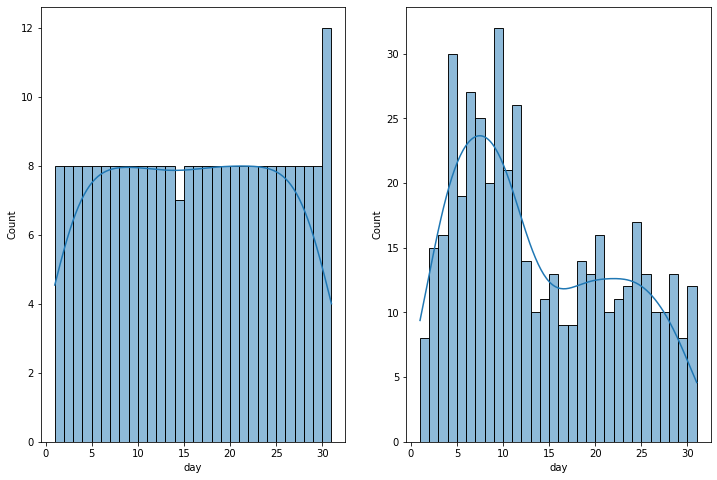

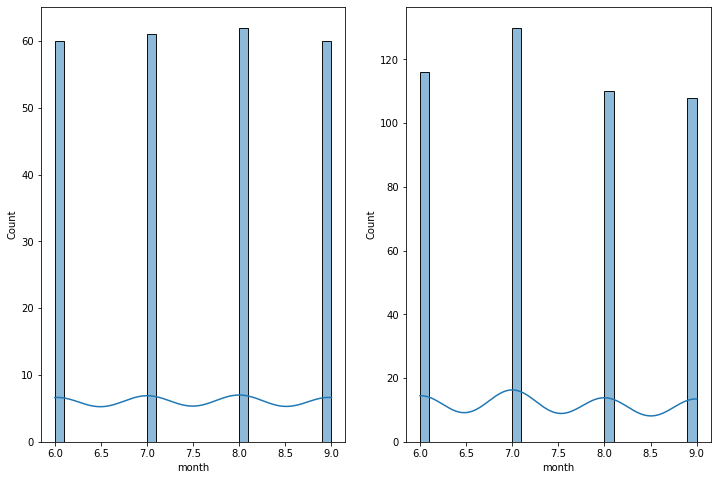

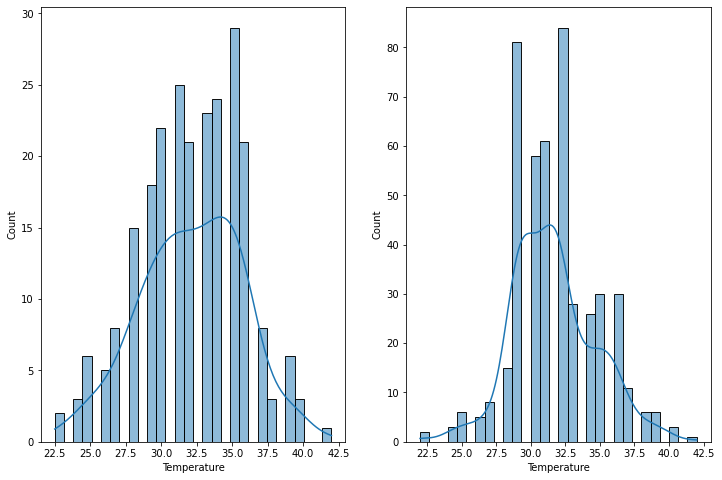

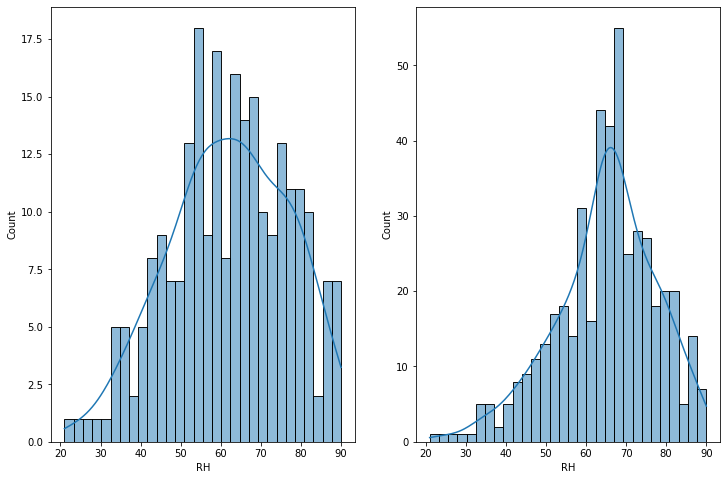

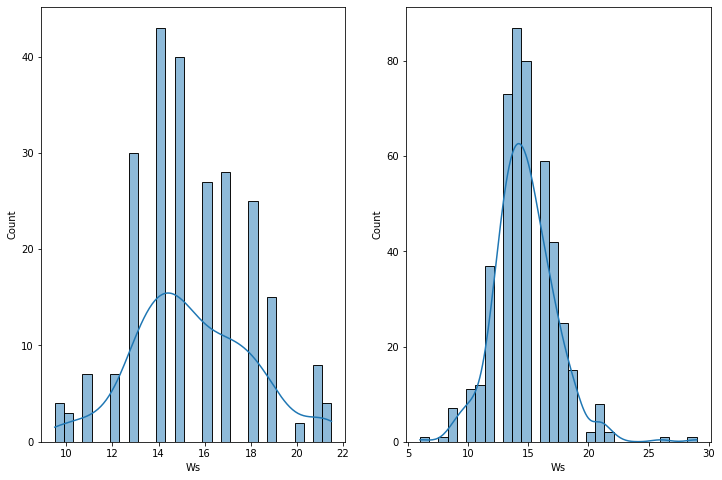

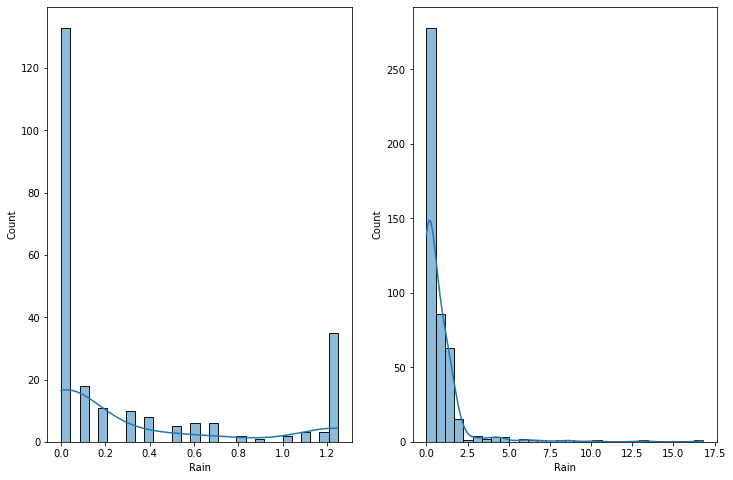

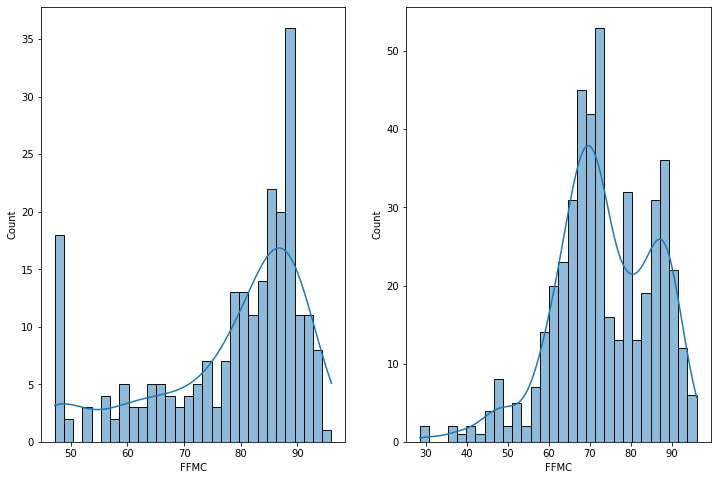

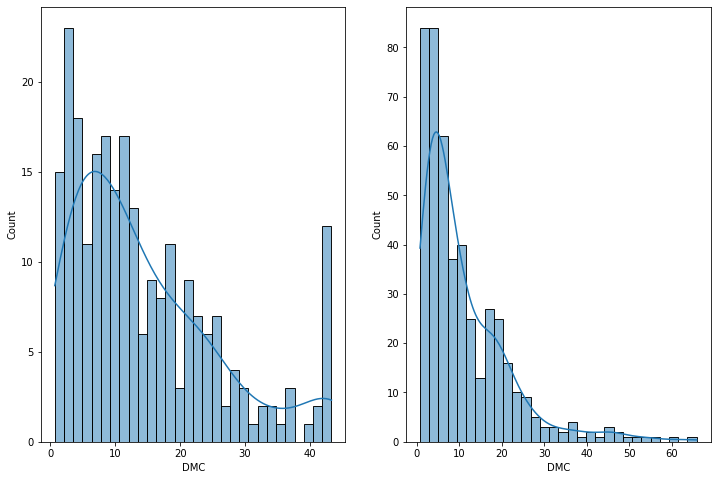

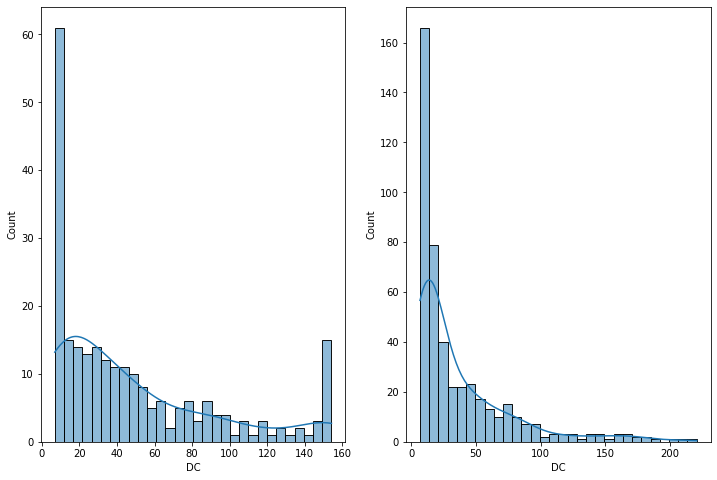

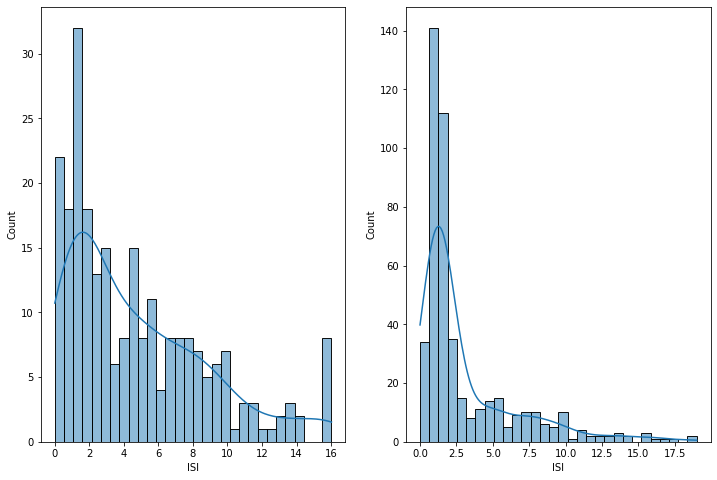

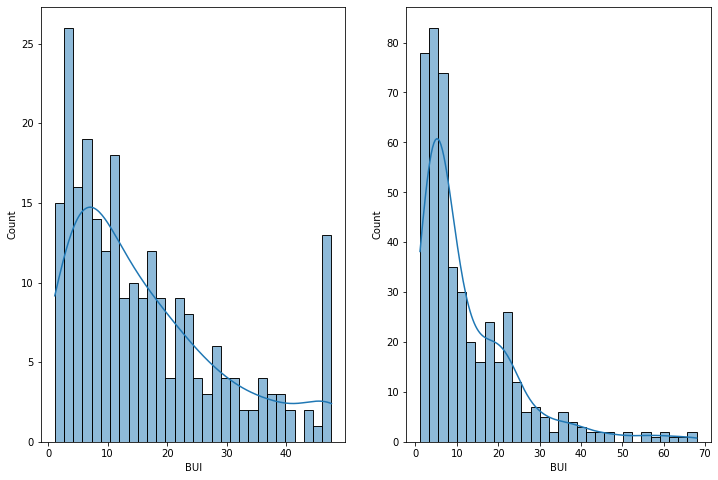

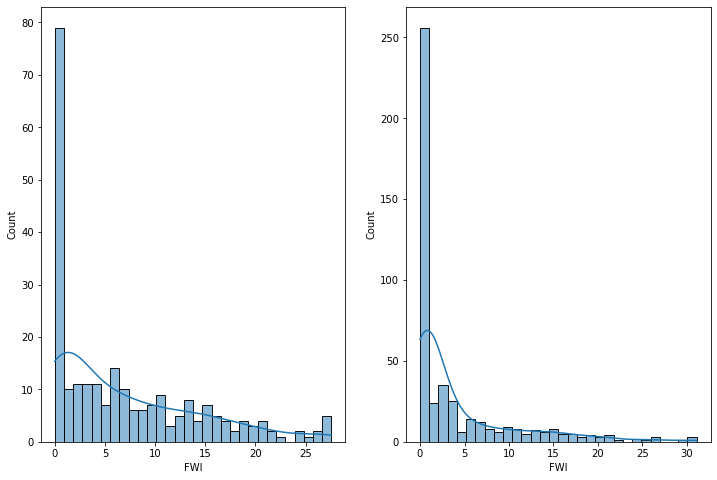

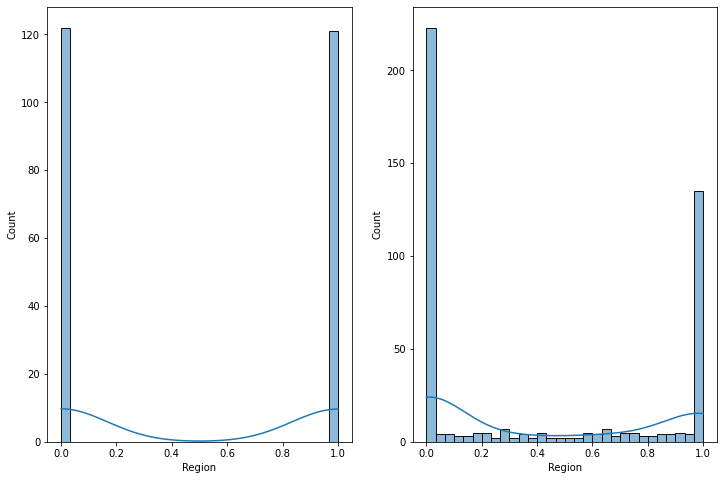

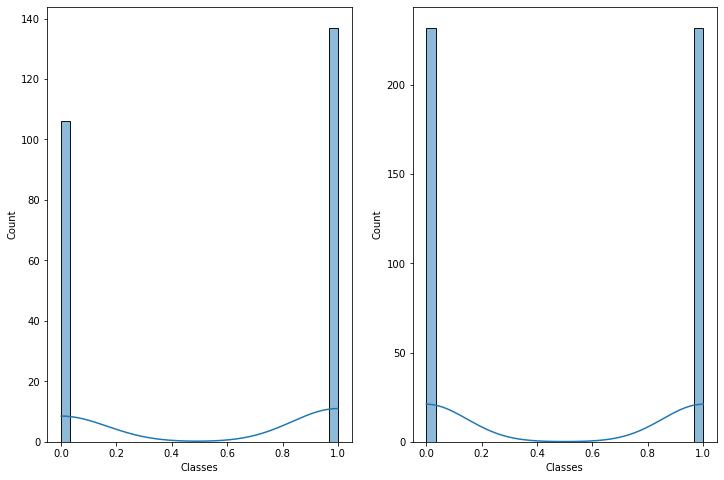

In [91]:
for i in num_data_bal:
    plt.figure(figsize = (12,8))
    plt.subplot(121)
    sns.histplot(data = data,x = i, kde = True,bins = 30)
    
    plt.subplot(122)
    sns.histplot(data =data_bal , x = i, kde = True, bins = 30)

## Checking the Outliers for Original and Balanced Dataset

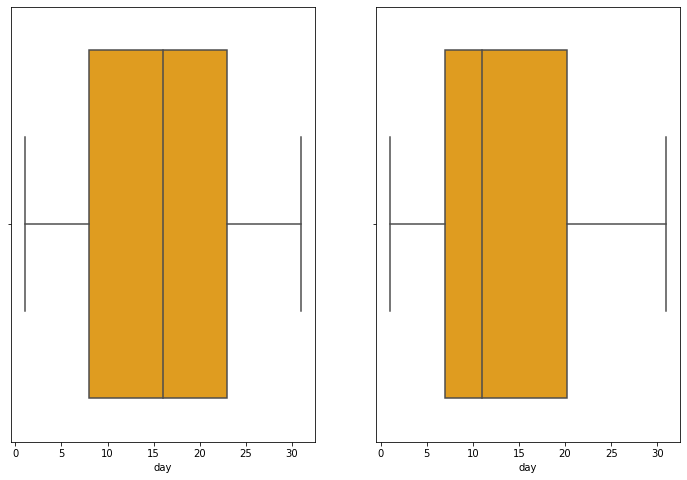

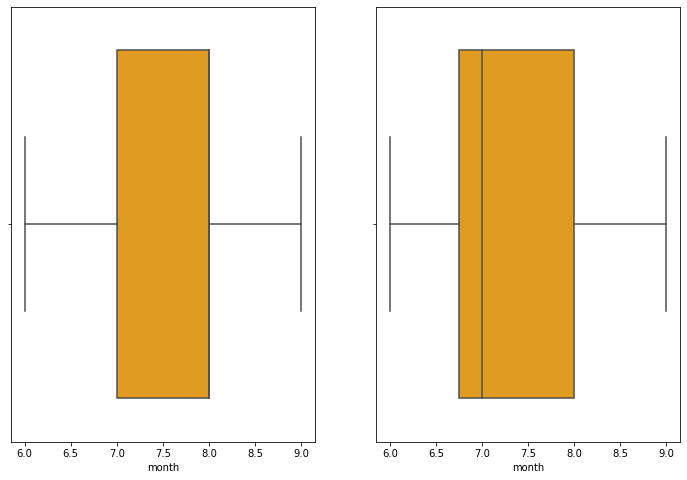

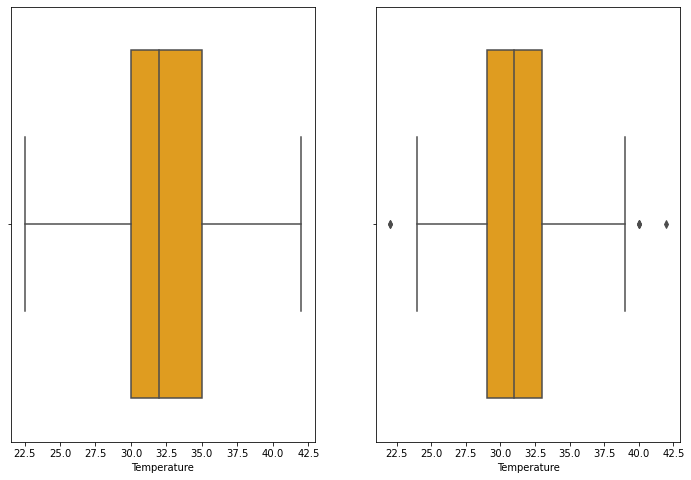

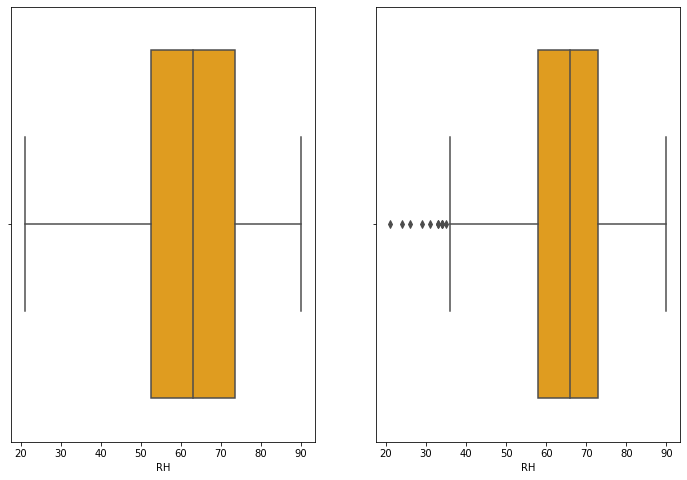

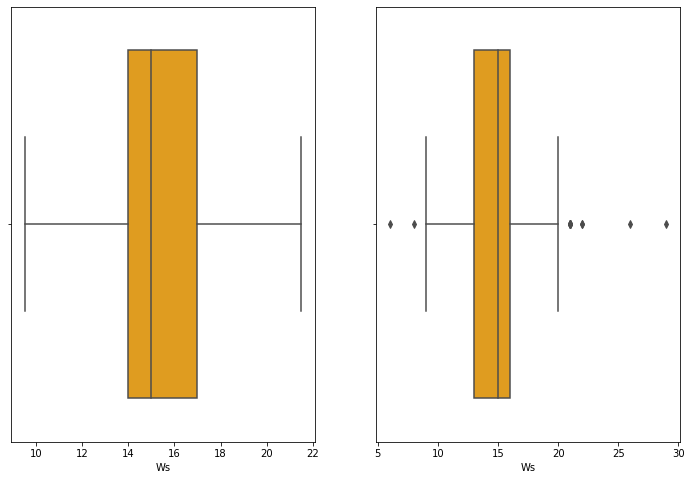

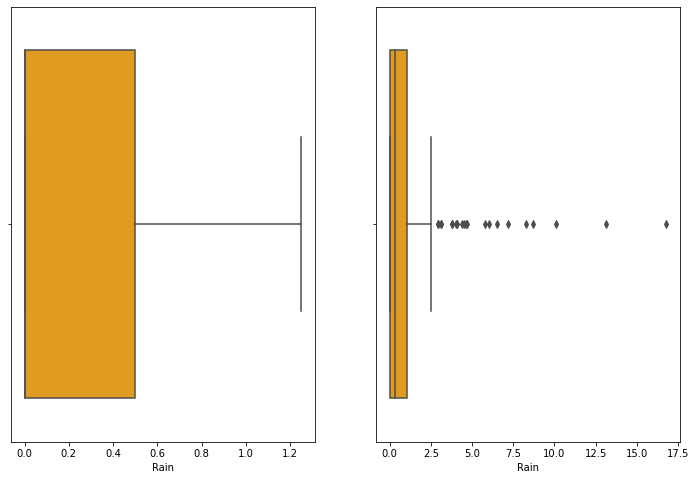

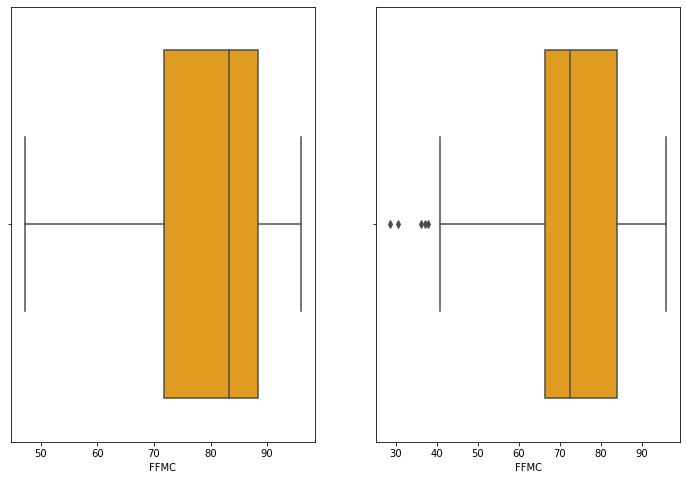

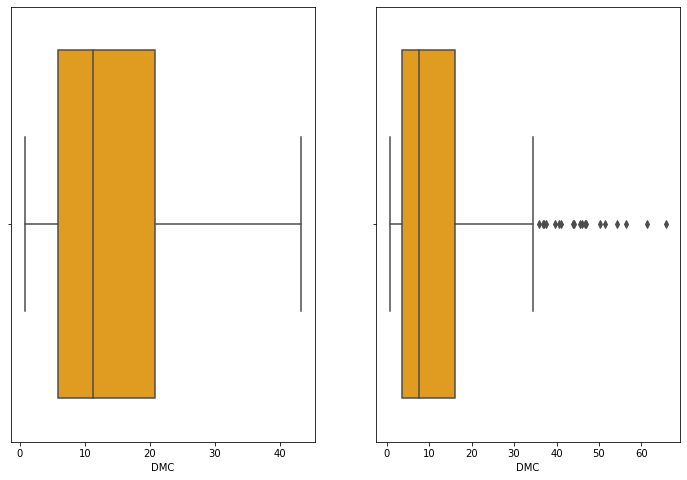

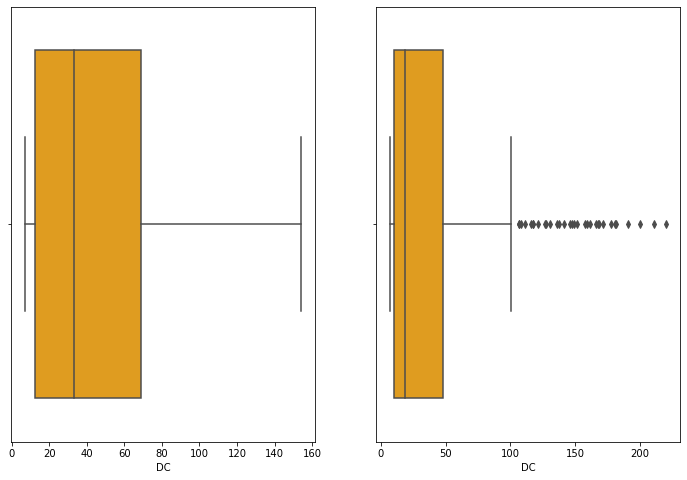

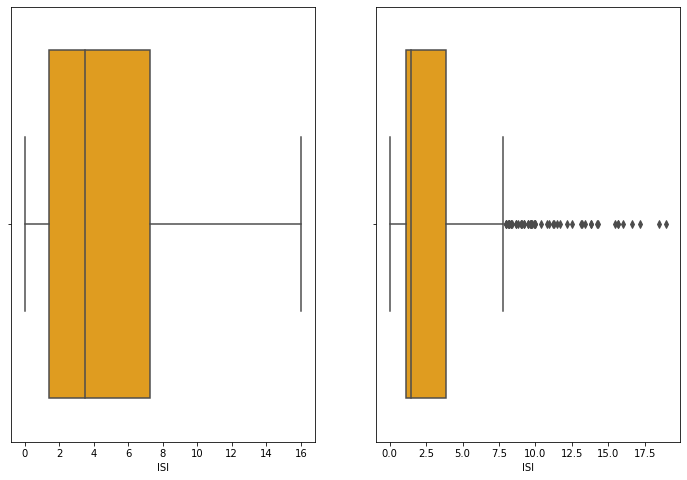

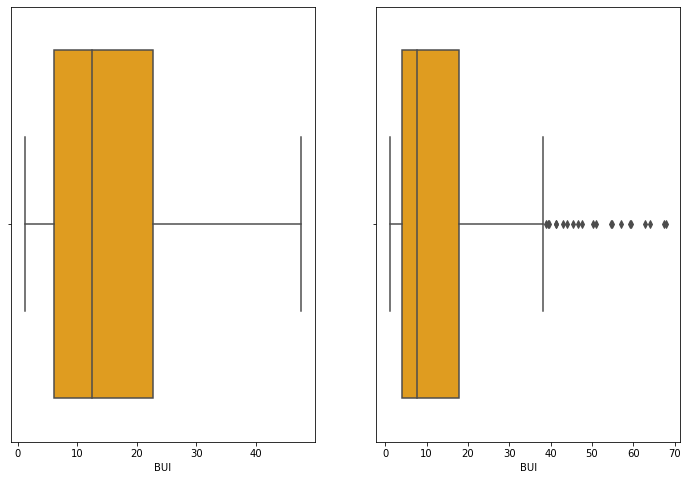

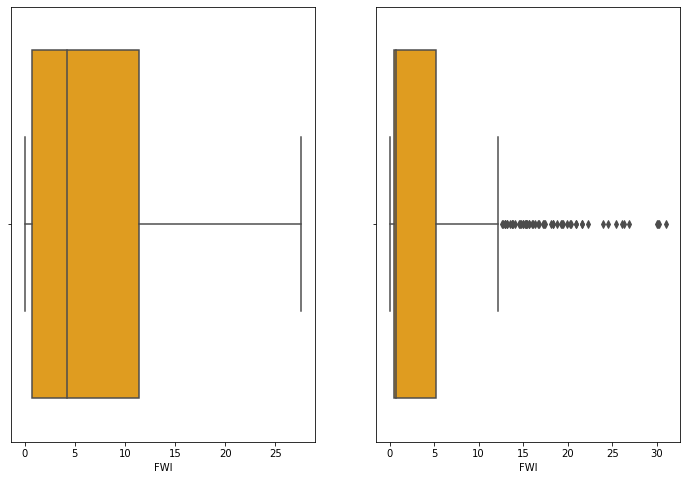

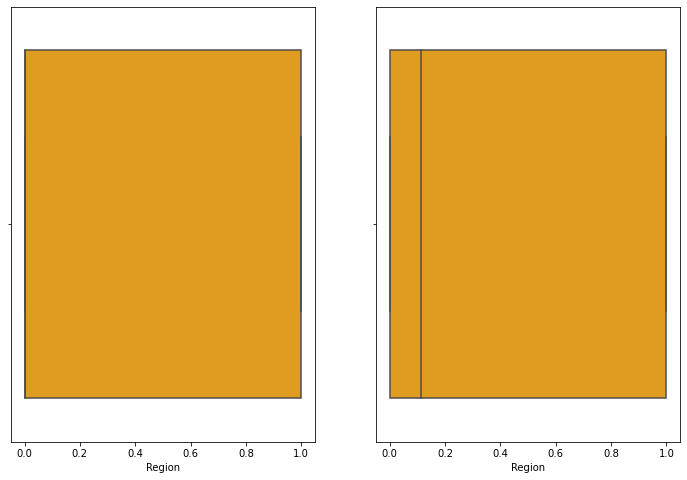

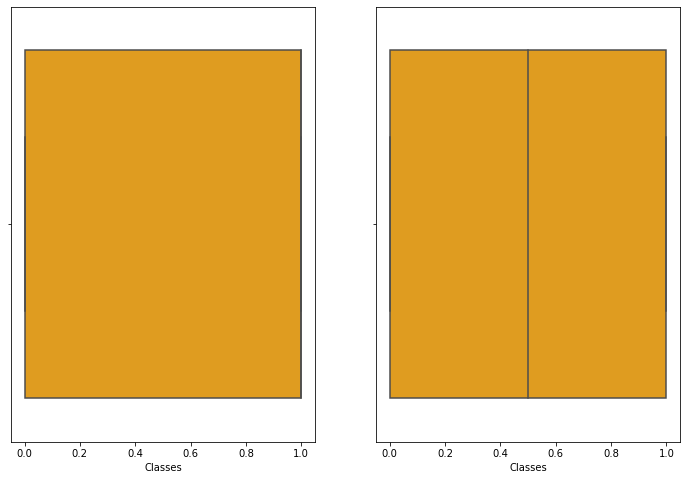

In [92]:
for i in num_data_bal:
    plt.figure(figsize = (12,8))
    plt.subplot(121)
    sns.boxplot(data = data,x = i,color ='orange')
    
    plt.subplot(122)
    sns.boxplot(data =data_bal , x = i, color = 'orange')

## Test Train Split

In [93]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X_bal,y_bal,test_size=0.30,random_state=16)

## Logistic Regression Model

In [94]:
from sklearn.linear_model import LogisticRegression
classifier_bal=LogisticRegression()
classifier_bal

LogisticRegression()

In [95]:
from sklearn.model_selection import GridSearchCV
parameter_bal={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [96]:
classifier_regressor_bal=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

## Standarizing or Feature Scaling

In [97]:
classifier_regressor_bal.fit(X_train1,y_train1)
print(classifier_regressor_bal.best_params_)
print(classifier_regressor_bal.best_score_)

{'C': 10, 'max_iter': 300, 'penalty': 'l2'}
0.913653846153846


## Prediction

In [98]:
y_bal_pred = classifier_regressor_bal.predict(X_test1)
y_bal_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

## Accuracy

In [99]:
from sklearn.metrics import accuracy_score,classification_report
bal_score = accuracy_score(y_bal_pred,y_test1)
print(bal_score)

0.9357142857142857


## Classification Report

In [100]:
print(classification_report(y_bal_pred,y_test1))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        87
           1       0.85      1.00      0.92        53

    accuracy                           0.94       140
   macro avg       0.93      0.95      0.93       140
weighted avg       0.95      0.94      0.94       140



# Performance Metrics

## Confusion Metrics

In [101]:
conf_mat_bal=confusion_matrix(y_bal_pred,y_test1)
conf_mat_bal

array([[78,  9],
       [ 0, 53]], dtype=int64)

In [102]:
true_positive = conf_mat_bal[0][0]
false_positive = conf_mat_bal[0][1]
false_negative = conf_mat_bal[1][0]
true_negative = conf_mat_bal[1][1]
print('true_positive:',true_positive)
print('false_positive:',false_positive)
print('true_negative:',true_negative)
print('false_negative:',false_negative)

true_positive: 78
false_positive: 9
true_negative: 53
false_negative: 0


## Precision

In [103]:
bal_Precision = true_positive/(true_positive+false_positive)
bal_Precision

0.896551724137931

## Recall

In [104]:
bal_recall = true_positive/(true_positive+false_negative)
bal_recall

1.0

## F1-Score

In [105]:
F1_Score_bal = 2*(bal_recall * bal_Precision) / (bal_recall + bal_Precision)
F1_Score_bal

0.9454545454545454

## Conclusion

## Performance of Logistic Model on Original Dataset

In [106]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95        28
         1.0       0.98      0.96      0.97        45

    accuracy                           0.96        73
   macro avg       0.95      0.96      0.96        73
weighted avg       0.96      0.96      0.96        73



### Performance of logistic model on balanced dataset which are created from imbalanced dataset

In [107]:
print(classification_report(y_bal_pred,y_test1))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        87
           1       0.85      1.00      0.92        53

    accuracy                           0.94       140
   macro avg       0.93      0.95      0.93       140
weighted avg       0.95      0.94      0.94       140



In [108]:
auc = roc_auc_score(y_pred, y_test)
print(f'Area under curve of original dataset: {auc}')

Area under curve of original dataset: 0.9599206349206351


In [109]:
auc1 = roc_auc_score(y_bal_pred, y_test1)
print(f'Area under curve of balaced dataset :{auc1}')

Area under curve of balaced dataset :0.9482758620689655


## Observation

- It seems that model is good when we predict from original dataset
- It seems that model is very bad when we try to predict from balanced(created from an imbalanced dataset )
- Also the area under curve (AUC) of original dataset is more, so that model is good

## The pickle.dump() method to save your model to a pickle file

In [112]:
# Define the filename for the pickle file

filename = 'classifier_bal.pkl'    #logistic regression

# Save the model to a pickle file using pickle.dump()
with open(filename, 'wb') as file:
    pickle.dump(classifier_bal, file)  #Use the pickle.dump() method to save your model to a pickle file

- we save the trained model to a pickle file using the pickle.dump() method. 

- We open the file in write binary mode using a with statement, and save the trained model object model to the file.

- After running a code, you should see a new file named model.pkl in the current working directory of your Jupyter Notebook environment, which contains the serialized machine learning model.

## Open the file in read binary mode and deserialize the Python object using pickle.load()

- Open the file in read binary mode using a with statement.

- Deserialize the Python object in the file using pickle.load() and assign it to a variable loaded_object.

In [113]:
# Define the filename for the pickle file
filename1 = 'classifier_bal.pkl'

# Open the file in read binary mode and deserialize the Python object using pickle.load()
with open(filename1, 'rb') as file1:
    loaded_object = pickle.load(file1)

# Print the loaded object to verify that it has been loaded correctly
print(loaded_object)

LogisticRegression()
